## Trees

Vamos a considerar el siguiente tipo de arboles (matematicos):

<image src="arbol.jpg" alt="Descripción de la imagen">

Es importante tener en cuenta los elementos que estan reflejados, pues los usaremos posteriormente.

Los arboles estan compuestos de iteraciones, que a su vez cada una de ellas se dividen en dos tallos. La union de tallos de distintas iteraciones da lugar a las ramas del arbol.

## Regression Trees

La idea de los algoritmos de arboles de regresion es segmentar las observaciones de los predictores $X_1,...,X_p$ para predecir el valor de la respuesta Y en base a esa informacion segmentada. Es algo asi como predecir $Y$ por grupos/segmentos.



### Definicion formal de un arbol de regresion:

***Elementos Básicos***

Tenemos unos predictores $\hspace{0.1cm} X_1,...,X_p \hspace{0.1cm}$ y una variable respuesta **cuantitativa** $Y$



Tenemos un arbol $\hspace{0.1cm} T \hspace{0.1cm}$  de la forma del expuesto en la imagen con $\hspace{0.1cm} m \hspace{0.1cm}$ iteraciones y $\hspace{0.1cm} m+1 \hspace{0.1cm}$ ramas.


$r_{ht}$ es la rama $h$ del arbol con $t$ iteraciones.


Cada iteracion del arbol tiene asociado uno de los predictores $\hspace{0.07cm} X_1,...,X_n$



Cada iteracion del arbol tiene dos tallos (tallo 1 (izquierdo) y tallo 2 (derecho)).



En cada tallo de una iteracion se define un intervalo. 

$\hspace{0.1cm} I_{lt} \hspace{0.1cm}$ es el intervalo asociado al tallo $l$ de la iteracion $\hspace{0.1cm} t$



Para simplificar el problema consideraremos $\hspace{0.1cm} I_{1t} = (-\infty \hspace{0.03cm},\hspace{0.03cm} s_t)\hspace{0.1cm}$  y $\hspace{0.1cm} I_{2t} = [s_t \hspace{0.03cm},\hspace{0.03cm} \infty]\hspace{0.1cm}$ donde $\hspace{0.1cm} s_t \hspace{0.1cm}$ es llamado punto de corte de la iteracion $\hspace{0.1cm} t \hspace{0.1cm}$ del arbol



$R_{ht} \hspace{0.1cm}$ es la region (rectangulo $n$-dimensional) definida por la rama $\hspace{0.1cm} h \hspace{0.1cm}$    de un arbol con $t$ iteraciones



Por ejemplo, considerando el arbol de arriba:

$R_{17} = \lbrace (v_1,...,v_n) \hspace{0.15cm}/\hspace{0.15cm} v_2 \in I_{11} \hspace{0.15cm} \text{y} \hspace{0.15cm} v_2 \in I_{12} \hspace{0.15cm} \text{y} \hspace{0.15cm}  v_1 \in I_{14} \hspace{0.15cm} \rbrace \hspace{0.1cm}$  

$R_{57} = \lbrace (v_1,...,v_n) \hspace{0.15cm}/\hspace{0.15cm} v_2 \in I_{21} \hspace{0.15cm} \text{y} \hspace{0.15cm} v_3 \in I_{13} \hspace{0.15cm} \text{y} \hspace{0.15cm}  v_4 \in I_{16} \hspace{0.15cm} \rbrace \hspace{0.1cm}$

***Criterio de prediccion de la variable respuesta:***


Dada una nueva observacion $\hspace{0.1cm} x_{new}= (x_{new,1},x_{new,2},...,x_{new,p} ) \hspace{0.1cm}$ la idea es predecir $\hspace{0.1cm} y_{new} \hspace{0.1cm}$ como sigue:



  $$Si \hspace{0.3cm} x_{new} \in R_{ht} \hspace{0.22cm}  \Rightarrow  \hspace{0.22cm} \widehat{y}_{new} = \widehat{y}_{R_{ht}} = \dfrac{1}{\# \lbrace i / x_i \in R_{ht} \rbrace} \cdot \sum_{i / x_i \in R_{ht}} y_i $$

$\widehat{y}_{R_{ht}}$ es la prediccion de la variable respuesta que un arbol de regresion con $t$ iteraciones hace para las observaciones que caen en la rama $h$ de dicho arbol.

***Objetivo:***

Definimos el **error de entrenamiento de la rama $h$ de un arbol de regresion con $t$ iteraciones** como el error cometido por ese arbol de regresion al predecir la respuesta para las observaciones de entrenamiento que caen en la rama $h$ , y esto se mide como la suma de los cuadrados de los errores de prediccion de la respuesta para las observaciones que caen en la rama $h$ :

$$SSR(R_{ht}) = \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}    x_i \in R_{ht}
\end{gather*}} (y_i - \widehat{y}_{R_{ht}})^2$$



Observación: 

El error de prediccion de la respuesta para un individuo $i$ de la muestra tal que $\hspace{0.1cm} x_i \in R_{ht} \hspace{0.1cm}$ es $\hspace{0.1cm} y_i - \widehat{y}_{R_{ht}} \hspace{0.1cm}$ , ya que $\hspace{0.1cm} \widehat{y}_{R_{ht}} \hspace{0.1cm}$ es la prediccion de la respuesta que este modelo hace para los individuos que caen en $R_{ht}$ $\hspace{0.1cm}($ cuyas observaciones de los predictores, $\hspace{0.1cm}x_i\hspace{0.1cm}$, caen en $\hspace{0.1cm}R_{ht})$


Definimos el **error global de entrenamiento de un arbol de regresion con $t$** iteraciones como la suma de los errores de entrenamiento de las ramas de ese arbol de regresion:  

$$\sum_{h=1}^{m} \hspace{0.1cm} SSR(R_{ht}) $$


El **objetivo** es construir un arbol de regresion con con $t$ iteraciones y $m$ ramas tal que **minimice** el **error global de entrenamiento**. 

Es decir, formalmente el objetivo es:

$$ \underset{R_{1t},..,R_{mt}}{Min}  \hspace{0.12cm}  \sum_{h=1}^{m} \hspace{0.1cm} SSR(R_{ht}) $$



Pero para escoger las regiones $\hspace{0.1cm} R_{1t},...,R_{mt} \hspace{0.1cm}$ que definen las ramas del arbol  hay que determinar dos elementos que definen a su vez a las regiones:

$1.\hspace{0.1cm}$ Qué predictores estan asociados a cada iteracion del arbol $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ Para cada iteracion $i$ escoger $X_j \hspace{0.01cm}$ $(\hspace{0.01cm} $ es decir, escoger $j \hspace{0.01cm})$
   
$2.\hspace{0.1cm}$ Qué intervalos estan asociados a cada uno de los dos tallos de cada interaccion $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ Para cada iteracion $t$ escoger $I_{1t}$ y $I_{2t}\hspace{0.1cm}$ $(\hspace{0.01cm}$ es decir, escoger el punto de corte $\hspace{0.07cm}s_t \hspace{0.04cm} )$
   

Por tanto el porblema a resolver se puede reformular como:

Para cada iteracion $\hspace{0.1cm} t \hspace{0.1cm}$ escoger $\hspace{0.1cm} X_j\hspace{0.01cm}$ $(\hspace{0.05cm}$ es decir $\hspace{0.01cm}j \hspace{0.05cm})\hspace{0.05cm}$ y $\hspace{0.05cm}( I_{1t}\hspace{0.1cm},\hspace{0.1cm}I_{2t} )\hspace{0.1cm}$ $\hspace{0.1cm}($ es decir $\hspace{0.1cm} s_t)\hspace{0.1cm}$ tal que se acaben formando un arbol cuyas ramas definan unas regiones $\hspace{0.1cm}R_{1t},...,R_{mt}\hspace{0.1cm}$ que **minimicen** $\hspace{0.1cm}\sum_{h=1}^{m} SSR(R_{ht})$

Algoritmo para la resolucion del problema $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ ***Algoritmo de particion binaria***

El siguiente algoritmo es una forma de resolver el problema planteado anteriormente. Consiste en ir generando el arbol de manera secuencial, iteracion a iteracion, minimizando en cada paso el error de prediccion de la respuesta para las observaciones de train que caen en las ramas asociadas a la iteracion en cuestion que esta siendo optimizada.
La idea es generar cada iteracion del arbol minimizando los errores de prediccion de la respuesta para len cada rama, hasta que se cumple un criterio de parada en el que no se generan mas iteraciones y el arbol queda finalizado.

El algoritmo se basa en la resolucion secuencial de problemas de minimizacion, uno por cada iteracion tenga el arbol que se acabará generando.


***Problema de la Iteracion 1:***


Arbol con 1 iteracion:

La idea es, determinar las regiones $R_{11}$ y $R_{21}$ del arbol con 1 iteracion   tal que minimizan el error de entrenamiento global del arbol con 1 iteracion.

Mas formalmente el problema planteado es:

$$

\underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.15cm} \left(\hspace{0.1cm} SSR_1 = SSR(R_{11})  +  SSR(R_{21}) \hspace{0.1cm}\right)   \hspace{0.1cm} =   \\[15pt] =\hspace{0.2cm} \underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}    x_i \in R_{11}
\end{gather*}  } (y_i - \widehat{y}_{R_{11}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{21}
\end{gather*} } (y_i - \widehat{y}_{R_{21}})^2 \hspace{0.2cm} \right)     \\[15pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_1}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_1
\end{gather*}  } (y_i - \widehat{y}_{R_{11}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_1
\end{gather*} } (y_i - \widehat{y}_{R_{21}})^2 \hspace{0.2cm} \right) 

$$


Notar que:

$R_{11} = \lbrace  (v_1 ,..., v_n) / v_j < s_1 \rbrace   \hspace{0.3cm}\Rightarrow\hspace{0.3cm}  [\hspace{0.1cm}  x_i \in R_{11}  \hspace{0.1cm} \Leftrightarrow \hspace{0.1cm} x_{ij} < s_1 \hspace{0.1cm}] \hspace{0.3cm}\Rightarrow\hspace{0.3cm} \lbrace i/x_i \in R_{11} \rbrace  = \lbrace i / x_{ij} < s_1 \rbrace$  

$ R_{12} = \lbrace  (v_1 ,..., v_n) / v_j \geqslant s_1 \rbrace   \hspace{0.3cm}\Rightarrow\hspace{0.3cm} [\hspace{0.1cm} x_i \in R_{21} \hspace{0.1cm} \Leftrightarrow \hspace{0.1cm} x_{ij} \geqslant s_1 \hspace{0.1cm}] \hspace{0.2cm}\Rightarrow\hspace{0.2cm} \lbrace i/x_i \in R_{11} \rbrace  = \lbrace i / x_{ij} \geqslant s_1 \rbrace$  

Notese que determinar $R_{11}$ y $R_{21}$  es equivalente a determinar el predictor $X_j$ $($ es decir $j)$  y el punto de corte $s_1$ asociados a la Iteracion 1, ya que $R_{11}$ y $R_{21}$ quedan determinadas al fijar $X_j$ y $s_1$

Donde : 

- $\hspace{0.2cm} j \in \lbrace  1,2,...,p \rbrace $

- Si $X_j$ es cuantitativa:

 $\hspace{0.7cm}$  Ordenamos las observaciones de $X_j$ y quitamos repeticiones, obtenemos $X_j^{order}$, entonces:



$$  s_1 \in \Biggl\{ \dfrac{ x_{(1)j} + x_{(2)j} }{2} \hspace{0.1cm}, \hspace{0.1cm} \dfrac{x_{(2)j} + x_{(3)j} }{2} \hspace{0.1cm} ,...,\hspace{0.1cm} \dfrac{x_{(n-1)j} + x_{(n)j} }{2}   \Biggl\}$$



Donde $\hspace{0.1cm} x_{(i)j} \hspace{0.1cm} $ es la observacion que ocupa la posicion $i$-esima en $\hspace{0.1cm}  X_j^{order}$



- Si $X_j$ es categorica con $c$ categorias:

$$ s_1 \in Rango(X_j) = \lbrace 0,1,..., c-1 \rbrace $$ 

Notese que la eleccion de $X_j$ determina el campo de variacion de $s_1$


- $SSR(R_{11})$ es el error de entrenamiento de la rama $1$ de un arbol de regresion con 1 iteracion  

- $SSR(R_{21})$ es el error de entrenamiento de la rama $2$ de un arbol de regresion con 1 iteracion  


Por otro lado:

$$\widehat{y}_{R_{11}} \hspace{0.1cm} = \hspace{0.1cm} \dfrac{1}{\# \lbrace i / x_i  \in R_{11} \rbrace} \cdot \sum_{i / x_i  \in R_{11}} y_i  \hspace{0.1cm} = \hspace{0.1cm} \dfrac{1}{\# \lbrace i / x_{ij}  < s_1 \rbrace} \cdot \sum_{i / x_i < s_1} y_i $$



$$\widehat{y}_{R_{21}} \hspace{0.1cm} = \hspace{0.1cm} \dfrac{1}{\# \lbrace i / x_i  \in R_{21} \rbrace} \cdot \sum_{i / x_i  \in R_{21}} y_i \hspace{0.1cm} = \hspace{0.1cm} \dfrac{1}{\# \lbrace i / x_i  \geqslant s_1 \rbrace} \cdot \sum_{i / x_i \geqslant s_1} y_i $$

$\widehat{y}_{R_{11}}$ es la prediccion de la respuesta dada por un arbol de regresion con 1 Iteracion para las observaciones que caen en la rama 1 de dicho arbol.

$\widehat{y}_{R_{21}}$ es la prediccion de la respuesta dada por un arbol de regresion con 1 Iteracion para las observaciones que caen en la rama 2 de dicho arbol.

Estos elementos no volveran a ser definidos en los sucesivos problemas de iteracion para no pecar de ser repetitivo, puesto que pueden ser facilmente extrapolados a cualquier problema de iteracion. Ademas las definiciones generales de estos elementos han sido expuestas ya anteriormente.

- Denotaremos por $\hspace{0.1cm} \left(\hspace{0.1cm} j^{*(i)} \hspace{0.05cm},\hspace{0.05cm} s^{*(i)} \hspace{0.1cm}\right) \hspace{0.1cm}$ a una solucion del problema de la Iteracion $i$ , para $i=1,...,m-1$

Arbol obtenido tras resolver el problema de la Iteracion 1:

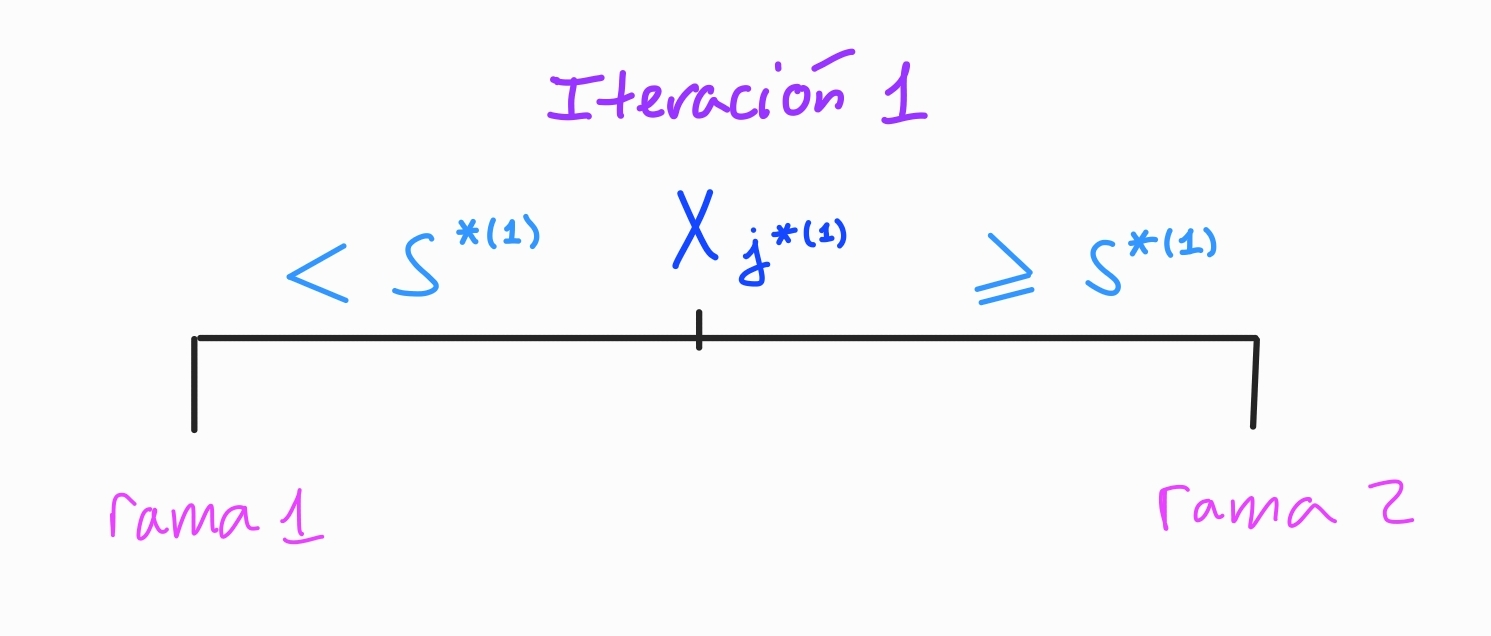

In [19]:
from IPython.display import Image
Image(filename='iter1.jpg', width = 600, height = 300) 

Si alguna de las ramas del arbol resultante de resolver el problema la iteracion 1 tiene menos de $\hspace{0.05cm}k\hspace{0.05cm}$ observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ se para el algoritmo

Si todas las ramas tienen $\hspace{0.05cm}k\hspace{0.05cm}$ o mas observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ el algoritmo continua, se pasa a resolver el problema de la iteracion siguiente, en este caso el de la iteracion 2

Notese que $k$ será un ***hiperparametro*** del algoritmo.

***Problema de la Iteracion 2:***

Arbol con 2 iteraciones tras resolver el problema anterior:

Si estamos en este problema es porque ninguna rama del arbol resultante del problema de la Iteracion 1 tiene menos de $k$ observaciones

La idea es, determinar las regiones $R_{12}$ , $R_{22}$ y $R_{32}$ del arbol con 2 iteraciones, considerando la solucion del problema de la iteracion 1 (arbol de arriba) , que minimizan el error de entrenamiento global de dicho arbol.

Mas formalmente el problema planteado es:

$$

\underset{R_{12}  ,  R_{22},  R_{32}}  {Min} \hspace{0.15cm} \left(\hspace{0.1cm} SSR_2 = SSR(R_{12})  +  SSR(R_{22}) +  SSR(R_{32}) \hspace{0.1cm}\right)   \hspace{0.1cm} =   \\[15pt] =\hspace{0.2cm} \underset{R_{12}  ,  R_{22}, R_{32}}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}    x_i \in R_{12}
\end{gather*}  } (y_i - \widehat{y}_{R_{12}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{22}
\end{gather*} } (y_i - \widehat{y}_{R_{22}})^2 \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{32}
\end{gather*} } (y_i - \widehat{y}_{R_{32}})^2  \hspace{0.2cm}  \right)     \\[15pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_2}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij } \hspace{0.05cm}   < \hspace{0.05cm} s_2
\end{gather*}  } (y_i - \widehat{y}_{R_{12}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}   x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\  x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2
\end{gather*} } (y_i - \widehat{y}_{R_{22}})^2 \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)}
\end{gather*} } (y_i - \widehat{y}_{R_{32}})^2 \hspace{0.2cm} \right) \\[15pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_2}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij } \hspace{0.05cm}   < \hspace{0.05cm} s_2
\end{gather*}  } (y_i - \widehat{y}_{R_{12}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}   x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\  x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2
\end{gather*} } (y_i - \widehat{y}_{R_{22}})^2   \hspace{0.2cm} \right) 
$$


Notese que el sumando:

$$ \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)}
\end{gather*} } (y_i - \widehat{y}_{R_{32}})^2 $$

NO depende de $(j, s_2)$ , por lo que puede sacarse de la funcion objetivo del problema de minimizacion sin que esto altere la solucion del problema.

Arbol tras resolver el problema de la Iteracion 2:


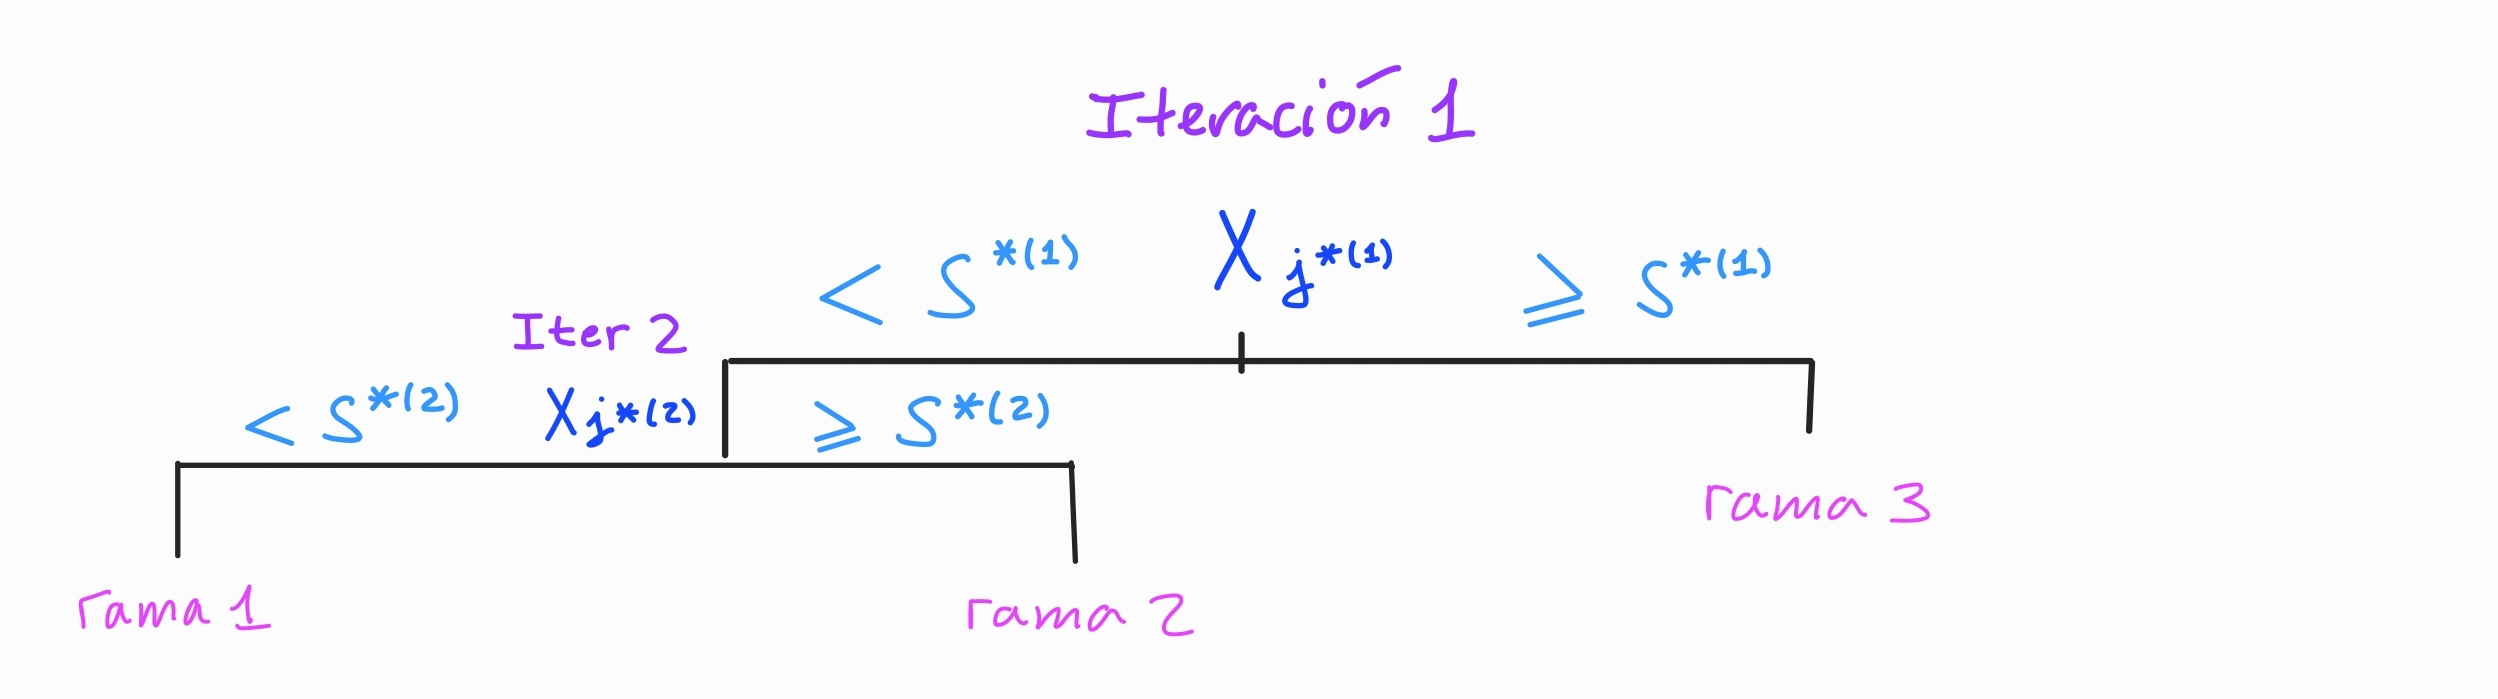

In [23]:
from IPython.display import Image
Image(filename='iter2.jpg', width = 940, height = 320)

Si alguna de las ramas tiene menos de $\hspace{0.05cm}k\hspace{0.05cm}$ observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ se para el algoritmo

Si todas las ramas tienen $\hspace{0.05cm}k\hspace{0.05cm}$ o mas observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ el algoritmo continua, se pasa a resolver el problema de la iteracion siguiente, en este caso el de la iteracion 2

***Problema de la Iteracion 3:***

Arbol con 3 iteraciones tras resolver el problema anterior:

Si estamos en este problema es porque ninguna rama del arbol resultante del problema de la Iteracion 2 tiene menos de $k$ observaciones

La idea es, determinar las regiones $R_{13}$ , $R_{23}$, $R_{33}$ y $R_{43}$ del arbol con 3 iteraciones, considerando la solucion del problema de la iteracion 2 (arbol de arriba),  que minimizan el error de entrenamiento global de dicho arbol.

Mas formalmente el problema se plantea como sigue:

$$

\underset{R_{13}  ,  R_{23},  R_{33},  R_{43}}  {Min} \hspace{0.15cm} \left(\hspace{0.1cm} SSR_3 = SSR(R_{13})  +  SSR(R_{23}) +  SSR(R_{33}) +  SSR(R_{43}) \hspace{0.1cm}\right)   \hspace{0.1cm} =   \\[15pt] =\hspace{0.2cm} \underset{R_{13}  ,  R_{23},  R_{33},  R_{43}}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}    x_i \in R_{13}
\end{gather*}  } (y_i - \widehat{y}_{R_{13}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{23}
\end{gather*} } (y_i - \widehat{y}_{R_{23}})^2 \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{33}
\end{gather*} } (y_i - \widehat{y}_{R_{33}})^2  \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{43}
\end{gather*} } (y_i - \widehat{y}_{R_{43}})^2  \hspace{0.2cm}  \right)     \\[15pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_3}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij } \hspace{0.05cm}   < \hspace{0.05cm} s^{*(2)}
\end{gather*}  } (y_i - \widehat{y}_{R_{13}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}   x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\  x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(2)}
\end{gather*} } (y_i - \widehat{y}_{R_{23}})^2 \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_3 
\end{gather*} } (y_i - \widehat{y}_{R_{33}})^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_3 
\end{gather*} } (y_i - \widehat{y}_{R_{43}})^2  \hspace{0.2cm} \right)  \\[15pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_3}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_3 
\end{gather*} } (y_i - \widehat{y}_{R_{33}})^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_3 
\end{gather*} } (y_i - \widehat{y}_{R_{43}})^2   \hspace{0.2cm} \right) 
$$


Notese que los sumandos :

$$ \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij } \hspace{0.05cm}   < \hspace{0.05cm} s^{*(2)}
\end{gather*}  } (y_i - \widehat{y}_{R_{13}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}   x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\  x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(2)}
\end{gather*} } (y_i - \widehat{y}_{R_{23}})^2  $$

NO dependen de $(j, s_3)$ , por lo que puede sacarse de la funcion objetivo del problema de minimizacion sin que esto altere la solucion del problema.

Arbol tras resolver el problema de la Iteracion 3

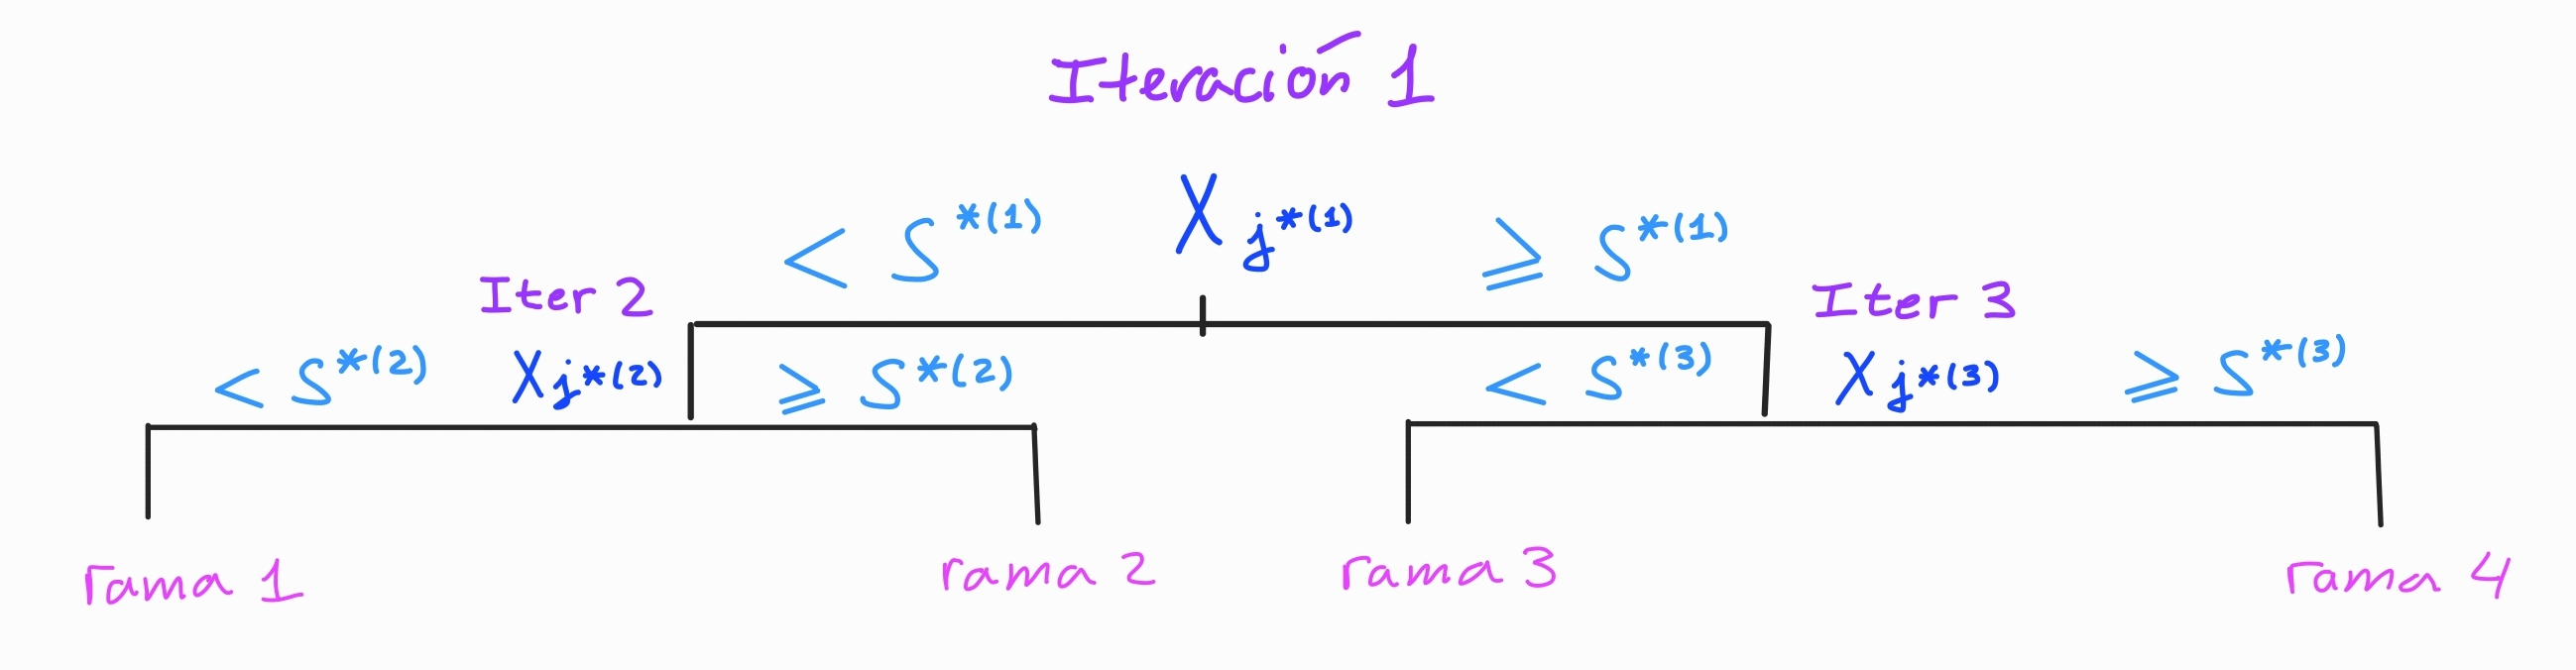

In [13]:
from IPython.display import Image
Image(filename='iter3.jpg', width = 800, height = 250)

Si alguna de las ramas tiene menos de $\hspace{0.05cm}k\hspace{0.05cm}$ observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ se para el algoritmo

Si todas las ramas tienen $\hspace{0.05cm}k\hspace{0.05cm}$ o mas observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ el algoritmo continua, se pasa a resolver el problema de la iteracion siguiente, en este caso el de la iteracion 2

***Problema de la Iteracion 4:***

Arbol con 4 iteraciones tras resolver el problema anterior:

Si estamos en este problema es porque ninguna rama del arbol resultante del problema de la Iteracion 3 tiene menos de $k$ observaciones

La idea es, determinar las regiones $R_{14}$ , $R_{24}$, $R_{34}$ , $R_{44}$, $R_{54}$ del arbol con 4 iteraciones, considerando la solucion del problema de la iteracion 3(arbol de arriba),  que minimizan el error de entrenamiento global de dicho arbol.

Mas formalmente el problema se plantea como sigue:

$$

\underset{R_{14}  ,  R_{24},  R_{34},  R_{44}, R_{54}  }  {Min} \hspace{0.15cm} \left(\hspace{0.1cm} SSR_4 = SSR(R_{14})  +  SSR(R_{24}) +  SSR(R_{34}) +  SSR(R_{44}) +  SSR(R_{54}) \hspace{0.1cm}\right)   \hspace{0.1cm} =   \\[15pt] =\hspace{0.2cm} \underset{R_{14}  ,  R_{24},  R_{34},  R_{44}, R_{54} }  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}    x_i \in R_{14}
\end{gather*}  } (y_i - \widehat{y}_{R_{14}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{24}
\end{gather*} } (y_i - \widehat{y}_{R_{24}})^2 \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{34}
\end{gather*} } (y_i - \widehat{y}_{R_{34}})^2  \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{44}
\end{gather*} } (y_i - \widehat{y}_{R_{44}})^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{54}
\end{gather*} } (y_i - \widehat{y}_{R_{54}})^2  \hspace{0.2cm}  \right)     \\[15pt]  = \hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_4}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(2)} \\ x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_4 
\end{gather*}  } (y_i - \widehat{y}_{R_{14}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}   x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\  x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(2)} \\ x_{ij} \hspace{0.05cm}  \geqslant \hspace{0.05cm} s_4
\end{gather*} } (y_i - \widehat{y}_{R_{24}})^2 \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}  \geqslant   \hspace{0.05cm} s^{*(3)}
\end{gather*} } (y_i - \widehat{y}_{R_{34}})^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(3)} 
\end{gather*} } (y_i - \widehat{y}_{R_{44}})^2  \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(3)}
\end{gather*} } (y_i - \widehat{y}_{R_{54}})^2 \hspace{0.2cm} \right)  \\[15pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_4}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(2)} \\ x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_4 
\end{gather*}  } (y_i - \widehat{y}_{R_{14}} )^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}   x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\  x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(2)} \\ x_{ij} \hspace{0.05cm}  \geqslant \hspace{0.05cm} s_4
\end{gather*} } (y_i - \widehat{y}_{R_{24}})^2    \hspace{0.2cm} \right) 
$$


Notese que los sumandos:

$$  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}  \geqslant   \hspace{0.05cm} s^{*(3)}
\end{gather*} } (y_i - \widehat{y}_{R_{34}})^2   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(3)} 
\end{gather*} } (y_i - \widehat{y}_{R_{44}})^2  \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(3)}
\end{gather*} } (y_i - \widehat{y}_{R_{54}})^2$$

NO dependen de $(j, s_4)$ , por lo que puede sacarse de la funcion objetivo del problema de minimizacion sin que esto altere la solucion del problema.

Arbol tras resolver el problema de la Iteracion 4

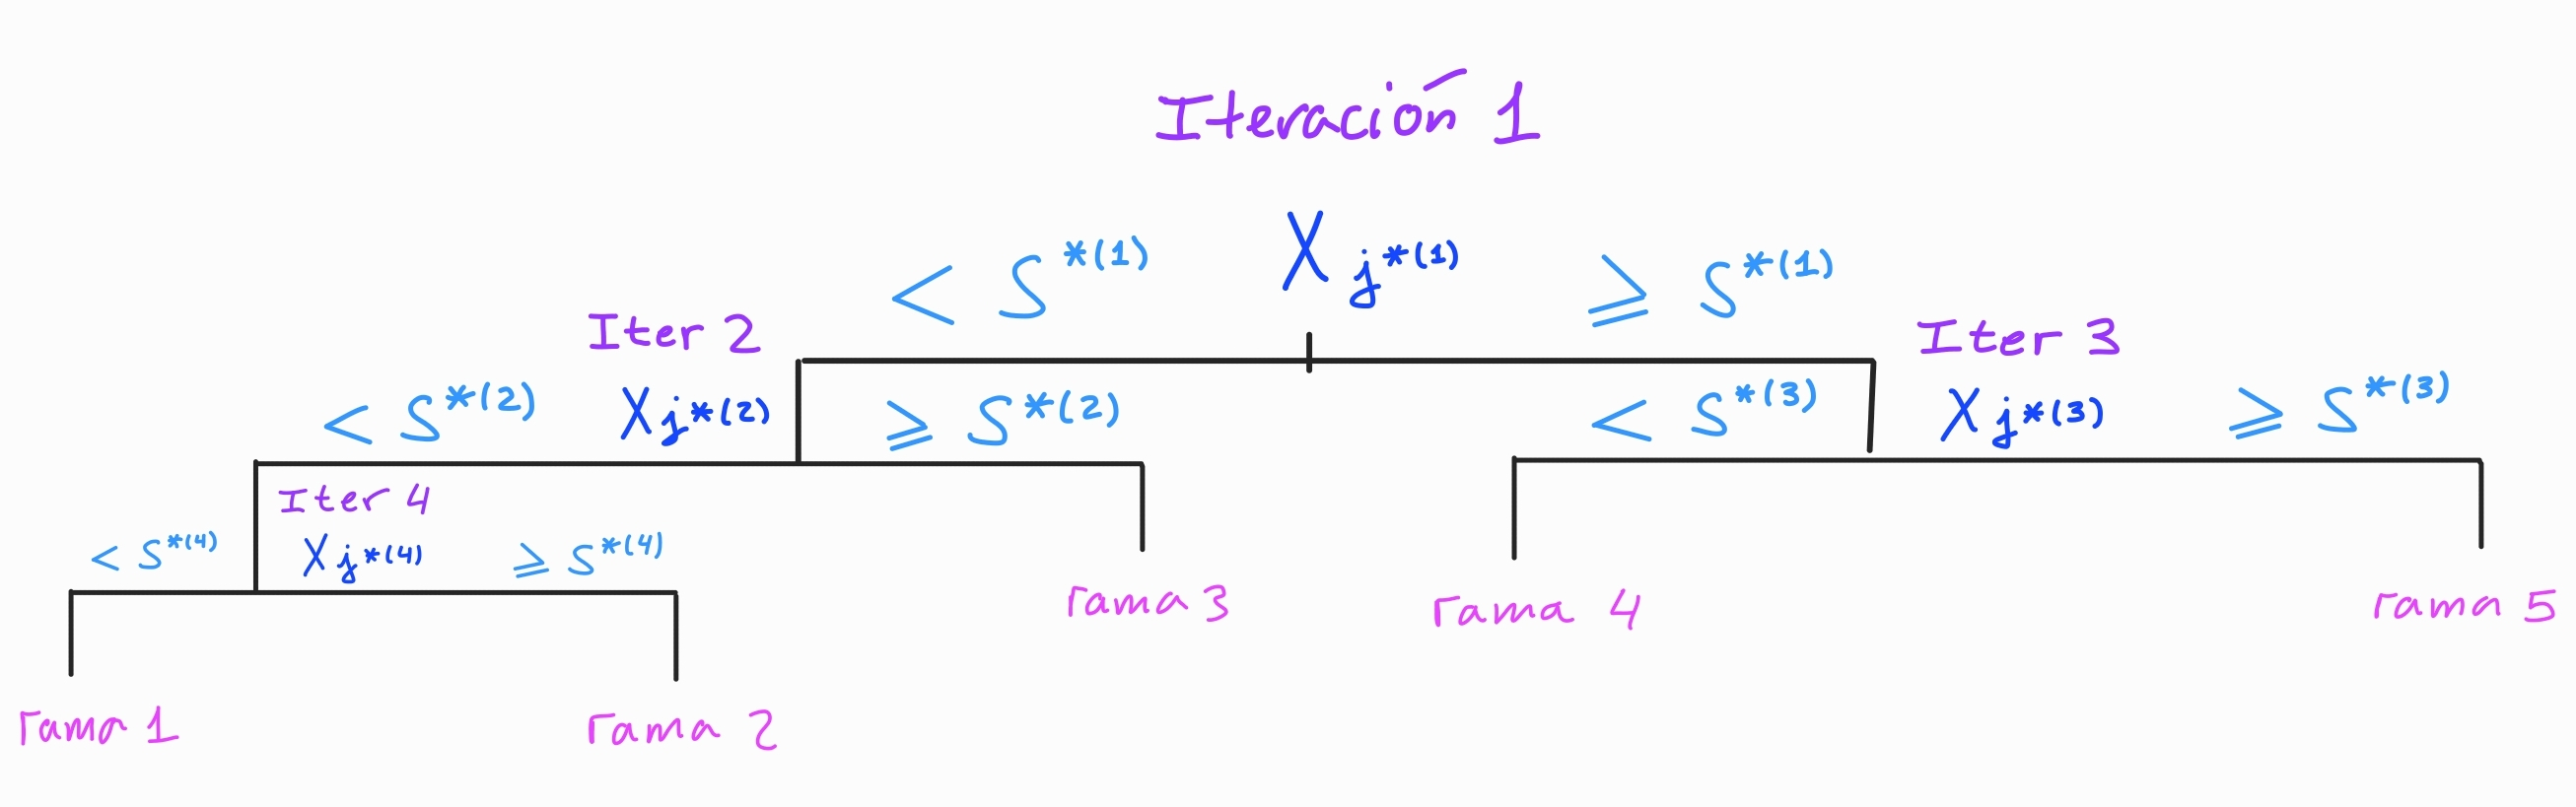

In [17]:
from IPython.display import Image
Image(filename='iter4.jpg', width = 980, height = 350)

Si alguna de las ramas tiene menos de $\hspace{0.05cm}k\hspace{0.05cm}$ observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ se para el algoritmo

Si todas las ramas tienen $\hspace{0.05cm}k\hspace{0.05cm}$ o mas observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ el algoritmo continua, se pasa a resolver el problema de la iteracion siguiente, en este caso el de la iteracion 2

Siempre que no se cumpla la condicon de parada se seguiria haciendo crecer el arbol generando nuevas iteraciones.

No seguiremos exponiendo mas iteraciones del algoritmo, puesto que es facilmente extrapolable lo expuesto a cualquier iteracion superior.

### Ejemplo de juguete


Ilustraremos con un ejemplo de juguete cómo es el funcionamiento del algoritmo expuesto. Especialmente la resolucion de los problemas de iteracion.



### Algoritmo Regression Tree en python

In [98]:
def regression_tree(Data_set, iterations_vector, k):

# POR AHORA SOLO GENERA 3 ITERACIONES EN EL ARBOL --> iterations_vector = range(1,4) como mucho (=[1,2,3])

########################################################################
    
# Data_set tiene que ser tal que, su columna 0 sea Y, y la j-esima sea la variable Xj , para j=1,...,p


    def s_values(j, Data_set):

        s_values = []

        if  (Data_set.dtypes[j] != 'float64') & (Data_set.dtypes[j] != 'int64') : # Para las variables categoricas s_value sera simplemente su rango.

            s_values = Data_set.sort_values(by=[Data_set.columns[j]], axis=0, ascending=True, ignore_index=True).iloc[:, j].unique()


        elif (Data_set.dtypes[j] == 'float64') | (Data_set.dtypes[j] == 'int64') :

            Xj_sorted = Data_set.sort_values(by=[Data_set.columns[j]], axis=0, ascending=True, ignore_index=True).iloc[:, j].unique()

        
            for i in range(0, len(Xj_sorted)-1):

                s_values.append( (Xj_sorted[i] + Xj_sorted[i+1] ) / 2  )

    
        return s_values


########################################################################  

   ## ITERACION 1

    if iterations_vector[0] == 1 : # nacimiento del arbol

        def RSS_1(j,s, Data_set):

         # Data_set tiene que ser tal que, su columna 0 sea Y, y la j-esima sea la variable Xj , para j=1,...,p

    ######################################

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_r11 = ( len( Data_set.loc[ Data_set.iloc[:, j] < s  , 'Y' ] ) != 0 )
            cond_r21 = ( len( Data_set.loc[ Data_set.iloc[:, j] >= s , 'Y' ] ) != 0 )


            if (cond_r11 == False) | (cond_r21 == False) :

                RSS_1 = math.inf

            elif  (cond_r11 == True) & (cond_r21 == True) : 

                y_i_r11 = Data_set.loc[ (Data_set.iloc[:, j] < s) , 'Y' ]

                y_r11 = y_i_r11.sum() / len( y_i_r11 )  
   
                
                y_i_r21 = Data_set.loc[ (Data_set.iloc[:, j] >= s) , 'Y' ]  

                y_r21 = y_i_r21.sum() / len( y_i_r21 )
           
                
                RSS_11 = ( (y_i_r11 - y_r11 )**2 ).sum()

                RSS_12 = ( (y_i_r21 - y_r21 )**2 ).sum()

                RSS_1 = RSS_11 + RSS_12

            ############

            return(RSS_1)


      ################################################

        ## Busqueda de j_star y s_star de la iteracion 1

        RSS_vector = []
        j_vector = []
        s_vector = []

        s_star_vector = []
        j_star_vector = []
        RSS_star_vector = []

        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                RSS_vector.append( RSS_1(j, s, Data_set) )

                j_vector.append( j )

                s_vector.append( s )

        RSS_df = pd.DataFrame({'RSS':RSS_vector, 'j':j_vector, 's':s_vector})

        RSS_df_sorted = RSS_df.sort_values(by=['RSS'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( RSS_df_sorted.loc[0, 's'] )
        j_star_vector.append( RSS_df_sorted.loc[0, 'j'] )
        RSS_star_vector.append(RSS_df_sorted.loc[0, 'RSS'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...    
        
      ###################################

        # Condicion de parada:

        obs_r11 = len( Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0] , : ] )
        obs_r21 = len( Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0] , : ] )

        if(obs_r11 < k) | (obs_r21 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 1 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations=1

            obs_ramas = [obs_r11 , obs_r21]


           

            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, RSS_star_vector, obs_ramas ) 

            ###################

        elif (obs_r11 >= k) & (obs_r21 >= k) : # No se cumple el criterio de parada

            pass


   ######################################################################################

    ## ITERACION 2

    if iterations_vector[1] == 2 :  # Desarrollar nodo R1 de la 1ª iteracion

        ################################################################

        def RSS_2(j,s, Data_set):    # Desarrollar nodo R1 de la 1ª iteracion --> considerar j_star_vector[0] y s_star_vector[0] (1ª iteracion) y < (R1)

         # Data_set tiene que ser tal que, su columna 0 sea Y, y la j-esima sea la variable Xj , para j=1,...,p

           ################

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_r12 = ( len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] < s) , 'Y' ] ) != 0 )
            cond2_r22 = ( len( Data_set.loc[ (Data_set.iloc[:, j] >= s) & (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) , 'Y' ] ) != 0 )
              

            if (cond_r12 == False) | (cond2_r22 == False) :

                RSS_2 = math.inf

            elif  (cond_r12 == True) & (cond2_r22 == True) : 

                y_i_r12 = Data_set.loc[  (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] < s) , 'Y' ]

                y_r12 = y_i_r12.sum() / len( y_i_r12 )  
   
                
                y_i_r22 = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] >= s)  , 'Y' ]  

                y_r22 = y_i_r22.sum() / len( y_i_r22 )
           
                
                RSS_21 = ( (y_i_r12 - y_r12 )**2 ).sum()

                RSS_22 = ( (y_i_r22 - y_r22 )**2 ).sum()

                RSS_2 = RSS_21 + RSS_22

            ############

            return(RSS_2)


      ###########################################

      # Busqueda de j_star y s_star de la iteracion 2:

        RSS_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                RSS_vector.append( RSS_2(j, s, Data_set) )

                j_vector.append( j )

                s_vector.append( s )

        RSS_df = pd.DataFrame({'RSS':RSS_vector, 'j':j_vector, 's':s_vector})

        RSS_df_sorted = RSS_df.sort_values(by=['RSS'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( RSS_df_sorted.loc[0, 's'] )
        j_star_vector.append( RSS_df_sorted.loc[0, 'j'] )
        RSS_star_vector.append(RSS_df_sorted.loc[0, 'RSS'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...


      ###################################

        # Condicion de parada:

        obs_r12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] )
        obs_r22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )
        obs_r32 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) , : ] )

        if(obs_r12 < k) | (obs_r22 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 2 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations=2
            
            obs_ramas = [obs_r12 , obs_r22, obs_r32]


           
            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, RSS_star_vector, obs_ramas ) 

            ###################


        elif (obs_r12 >= k) & (obs_r22 >= k) : # No se cumple el criterio de parada

            pass



####################################################################################

## ITERACION 3

    if iterations_vector[2] == 3 :  # Desarrollar nodo R2 de la 1ª iteracion -->  considerar j_star_vector[0] y s_star_vector[0] (1ª iteracion) y >= (R2)

       #########################################

        def RSS_3(j,s, Data_set):    

         # Data_set tiene que ser tal que, su columna 0 sea Y, y la j-esima sea la variable Xj , para j=1,...,p

           ################

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_r33 = ( len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] < s)  , 'Y' ] ) != 0 )
            cond_r43 = ( len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] >= s) , 'Y' ] ) != 0 )
              

            if (cond_r33 == False) | (cond_r43 == False) :

                RSS_3 = math.inf

            elif  (cond_r33 == True) & (cond_r43 == True) : 

                y_i_r33 = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] < s)  , 'Y' ]

                y_r33 = (y_i_r33).sum() / len( y_i_r33 )  
   
                
                y_i_r43 = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] >= s)   , 'Y' ]  

                y_r43 = (y_i_r43).sum() / len( y_i_r43 )
           
                
                RSS_31 = ( (y_i_r33 - y_r33 )**2 ).sum()

                RSS_32 = ( (y_i_r43 - y_r43 )**2 ).sum()

                RSS_3 = RSS_31 + RSS_32
            

            ############

            return(RSS_3)


       ###########################################

      # Busqueda de j_star y s_star de la iteracion 3:

        RSS_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                RSS_vector.append( RSS_3(j, s, Data_set) )

                j_vector.append( j )

                s_vector.append( s )

        RSS_df = pd.DataFrame({'RSS':RSS_vector, 'j':j_vector, 's':s_vector})

        RSS_df_sorted = RSS_df.sort_values(by=['RSS'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( RSS_df_sorted.loc[0, 's'] )
        j_star_vector.append( RSS_df_sorted.loc[0, 'j'] )
        RSS_star_vector.append(RSS_df_sorted.loc[0, 'RSS'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...


      ###################################

        # Condicion de parada:

        obs_r13 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] )
        obs_r23 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )

        obs_r33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] )
        obs_r43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] )


        if(obs_r33 < k) | (obs_r43 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations = 3
            
            obs_ramas = [obs_r13, obs_r23, obs_r33 , obs_r43]


           

            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, RSS_star_vector, obs_ramas ) 

            ###################


        elif (obs_r33 >= k) & (obs_r43 >= k) : # No se cumple el criterio de parada

            pass

    #######################


    ## ITERACION 4

    if iterations_vector[3] == 4 :  

       #########################################

        def RSS_4(j,s, Data_set):    

         # Data_set tiene que ser tal que, su columna 0 sea Y, y la j-esima sea la variable Xj , para j=1,...,p

           ################

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_r14 = ( len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) &  (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) &  (Data_set.iloc[:, j] < s) , 'Y' ] ) != 0 )
            cond_r24 = ( len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) &  (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) &  (Data_set.iloc[:, j] >= s) , 'Y' ] ) != 0 )
              

            if (cond_r14 == False) | (cond_r24 == False) :

                RSS_3 = math.inf

            elif  (cond_r14 == True) & (cond_r24 == True) : 

                y_i_r14 = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] < s)  , 'Y' ]

                y_r14 = (y_i_r14).sum() / len( y_i_r14 )  
   
                
                y_i_r24 = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] >= s)   , 'Y' ]  

                y_r24 = (y_i_r24).sum() / len( y_i_r24 )
           
                
                RSS_41 = ( (y_i_r14 - y_r14 )**2 ).sum()

                RSS_42 = ( (y_i_r24 - y_r24 )**2 ).sum()

                RSS_4 = RSS_41 + RSS_42
            

            ############

            return(RSS_4)


       ###########################################

      # Busqueda de j_star y s_star de la iteracion 4:

        RSS_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                RSS_vector.append( RSS_4(j, s, Data_set) )

                j_vector.append( j )

                s_vector.append( s )

        RSS_df = pd.DataFrame({'RSS':RSS_vector, 'j':j_vector, 's':s_vector})

        RSS_df_sorted = RSS_df.sort_values(by=['RSS'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( RSS_df_sorted.loc[0, 's'] )
        j_star_vector.append( RSS_df_sorted.loc[0, 'j'] )
        RSS_star_vector.append(RSS_df_sorted.loc[0, 'RSS'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...


      ###################################

        # Condicion de parada:

        obs_r14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] < s_star_vector[3]) , : ] )
        obs_r24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] >= s_star_vector[3]) , : ] )

        obs_r34 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )
        obs_r44 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] )
        obs_r54 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] )


        if(obs_r14 < k) | (obs_r24 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations = 4
            
            obs_ramas = [obs_r14, obs_r24, obs_r34 , obs_r44, obs_r54]


          

            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, RSS_star_vector, obs_ramas ) 

            ###################


        elif (obs_r14 >= k) & (obs_r24 >= k) : # No se cumple el criterio de parada

            print('Se ha generado el arbol mas grande permitido por el algoritmo (arbol con 4 Iteraciones)')

        # Aunque no se haya cummplido el criterio de parada como esta es la ultima Iteracion contemplada por el algoritmo, 
        # debemos calcular las metricas finales para que sean escupidas por el algoritmo. 
            
            number_iterations=4
            
            obs_ramas = [obs_r14, obs_r24, obs_r34, obs_r44, obs_r54]

            
              
            pass

    #######################
        
   
    return(number_iterations, j_star_vector, s_star_vector, RSS_star_vector, obs_ramas ) 


In [105]:
def regression_tree_PREDICTIONS(Data_set, number_iterations, j_star_vector, s_star_vector, obs_ramas, x_new):

    if number_iterations == 1 :

            obs_r11 = obs_ramas[0]
            obs_r21 = obs_ramas[1]


        ### Prediccion:

            # Si x_new cae en r11 

            if x_new[j_star_vector[0] - 1] < s_star_vector[0] :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                y_new_predict = Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0] , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r11

            
            # Si x_new cae en r21

            elif x_new[j_star_vector[0] - 1] >= s_star_vector[0] :

                y_new_predict = Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0] , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r21

            

        
    if number_iterations == 2 :

            obs_r12 = obs_ramas[0]
            obs_r22 = obs_ramas[1]
            obs_r32 = obs_ramas[2]


        ### Prediccion:

            # Si x_new cae en r12

            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1] ] < s_star_vector[1]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r12

            
            # Si x_new cae en r22

            elif (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] >= s_star_vector[1])  :

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1] ] >= s_star_vector[1]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r22

            # Si x_new cae en r32

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) :

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r32

        
    if number_iterations == 3:

            obs_r13 = obs_ramas[0]
            obs_r23 = obs_ramas[1]
            obs_r33 = obs_ramas[2]
            obs_r43 = obs_ramas[3]

        ### Prediccion:

            # Si x_new cae en r13

            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1] ] < s_star_vector[1]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r13


            # Si x_new cae en r23


            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] >= s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1] ] >= s_star_vector[1]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r23



            # Si x_new cae en r33

            if (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] < s_star_vector[2]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2] ] < s_star_vector[2]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r33

            
            # Si x_new cae en r43

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] >= s_star_vector[2])  :

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2] ] >= s_star_vector[2]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r43

    
    if number_iterations == 4 :

            obs_r14 = obs_ramas[0]
            obs_r24 = obs_ramas[1]
            obs_r34 = obs_ramas[2]
            obs_r44 = obs_ramas[3]
            obs_r54 = obs_ramas[4]


         ### Prediccion:

            # Si x_new cae en r14

            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1] ] < s_star_vector[1]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r14


            # Si x_new cae en r24


            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) & (x_new[j_star_vector[3] - 1] >= s_star_vector[3]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1] ] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3] ] >= s_star_vector[3]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r24



            # Si x_new cae en r34

            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] >= s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1] ] >= s_star_vector[1]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r34

            
            # Si x_new cae en r44

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] < s_star_vector[2])  :

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2] ] < s_star_vector[2]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r44

            
            # Si x_new cae en r54

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] >= s_star_vector[2])  :

                y_new_predict = Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2] ] >= s_star_vector[2]) , 'Y' ]

                y_new_predict = y_new_predict.sum() / obs_r54

        


        
    return(y_new_predict)

In [3]:
import pandas as pd
import numpy as np
import math

In [83]:
np.random.seed(123)

Y =  np.random.chisquare(15, size=3000)
X1 = np.random.beta(10, 55, size=3000)
X2 = np.random.normal(loc=40, scale=5, size=3000)
X3 = np.random.chisquare(5, size=3000)
X4 = np.random.exponential(25, size=3000)
X5 = np.random.uniform(0,1,size=3000).round()

In [58]:
Data = pd.DataFrame({'Y':Y , 'X1':X1, 'X2':X2, 'X3':X3, 'X4':X4, 'X5':X5})

In [59]:
Data['X5'] = Data['X5'].astype('object') # si ponemos astype('category') luego nos salen problemas en el algoritmo creado

In [47]:
Data.dtypes

Y     float64
X1    float64
X2    float64
X3    float64
X4    float64
X5     object
dtype: object

In [48]:
Data.head()

,Y,X1,X2,X3,X4,X5
0,-16.284459,0.099887,26.254030,4.733799,0.493118,0.0
1,14.960182,0.099282,37.547963,2.262337,-13.475474,0.0
2,4.244677,0.087652,38.715532,1.878408,0.510908,0.0
3,-22.594421,0.136360,40.882493,7.511033,-1.674612,1.0
4,-8.679004,0.111113,46.653771,0.924432,-3.976957,0.0


In [60]:
np.random.seed(123)

x1 = np.random.beta(10, 55, size=1)
x2 = np.random.normal(loc=40, scale=5, size=1)
x3 = np.random.chisquare(5, size=1)
x4 = np.random.exponential(25, size=1)
x5 = np.random.uniform(0,1,size=1).round()

In [50]:
x_new = pd.Series({'X1': x1 , 'X2':x2, 'X3': x3, 'X4': x4, 'X5':x5})

In [51]:
x_new

X1    [0.09658644770637564]
X2     [37.106998740157316]
X3     [3.7595521670320813]
X4      [54.48371081944622]
X5                    [0.0]
dtype: object

In [77]:
j_star_vector, s_star_vector, RSS_star_vector, obs_ramas, y_new_predict = regression_tree(Data, range(1,4), 20, x_new)

El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo 20 de observaciones por rama


In [78]:
j_star_vector

[4, 4, 2]

In [79]:
s_star_vector

[6.105152373155679, 5.459274810022533, 53.55205413057425]

In [80]:
RSS_star_vector

[430168.71869520796, 85936.64898494472, 340844.23385333276]

In [81]:
obs_ramas

[380, 42, 1573, 5]

In [ ]:
regression_tree_PREDICTIONS(Data, number_iterations, j_star_vector, s_star_vector, obs_ramas, x_new)

Cross-Validation 

New Data (test set)

In [84]:
np.random.seed(666)

Y =  np.random.chisquare(15, size=500)
X1 = np.random.beta(10, 55, size=500)
X2 = np.random.normal(loc=40, scale=5, size=500)
X3 = np.random.chisquare(5, size=500)
X4 = np.random.exponential(25, size=500)
X5 = np.random.uniform(0,1,size=500).round()

In [85]:
Data_New = pd.DataFrame({'Y':Y , 'X1':X1, 'X2':X2, 'X3':X3, 'X4':X4, 'X5':X5})

In [86]:
Data_New['X5'] = Data_New['X5'].astype('object') # si ponemos astype('category') luego nos salen problemas en el algoritmo creado

In [107]:
y_predictions_vector = []

for i in range(0, len(Data_New)) :

    x_new = Data_New.iloc[ i , range(1,Data_New.shape[1])]

    y_new_predict = regression_tree_PREDICTIONS(Data, number_iterations, j_star_vector, s_star_vector, obs_ramas, x_new)


    y_predictions_vector.append(y_new_predict)

In [112]:
( (y_predictions_vector - Data_New.loc[: , 'Y'])**2 ).sum()

133269.10917382658

Comparando con regresion lineal:

In [114]:
import statsmodels.formula.api as smf

In [115]:
RLM = smf.ols(formula = 'Y ~ X1 + X2 + X3 + X4 + X5', data = Data)

RLM = RLM.fit()

In [119]:
(( RLM.predict(Data_New) - Data_New.loc[: , 'Y'])**2 ).sum()

131130.18605422857

## Classification Trees

La idea de los algoritmos de arboles de clasificacion es segmentar las observaciones de los predictores $X_1,...,X_p$ para predecir el valor de la respuesta $Y$ en base a esa informacion segmentada. Es algo asi como predecir Y por grupos/segmentos.



#### Definicion formal de los arboles de clasificación:

Tenemos unos predictores $\hspace{0.1cm} X_1,...,X_p \hspace{0.1cm}$ y una variable respuesta **categorica** $Y$



Tenemos un arbol $\hspace{0.1cm} T \hspace{0.1cm}$  de la forma del expuesto en la imagen con $\hspace{0.1cm} m \hspace{0.1cm}$ iteraciones y $\hspace{0.1cm} m+1 \hspace{0.1cm}$ ramas.


$r_{ht}$ es la rama $h$ del arbol con $t$ iteraciones.


Cada iteracion del arbol tiene asociado uno de los predictores $\hspace{0.07cm} X_1,...,X_n$



Cada iteracion del arbol tiene dos tallos (tallo 1 (izquierdo) y tallo 2 (derecho)).



En cada tallo de una iteracion se define un intervalo. 

$\hspace{0.1cm} I_{lt} \hspace{0.1cm}$ es el intervalo asociado al tallo $l$ de la iteracion $\hspace{0.1cm} t$



Para simplificar el problema consideraremos $\hspace{0.1cm} I_{1t} = (-\infty \hspace{0.03cm},\hspace{0.03cm} s_t)\hspace{0.1cm}$  y $\hspace{0.1cm} I_{2t} = [s_t \hspace{0.03cm},\hspace{0.03cm} \infty]\hspace{0.1cm}$ donde $\hspace{0.1cm} s_t \hspace{0.1cm}$ es llamado punto de corte de la iteracion $\hspace{0.1cm} t \hspace{0.1cm}$ del arbol



$R_{ht} \hspace{0.1cm}$ es la region (rectangulo $n$-dimensional) definida por la rama $\hspace{0.1cm} h \hspace{0.1cm}$    de un arbol con $t$ iteraciones


***Criterio de prediccion de la variable respuesta:***


Dada una nueva observacion $\hspace{0.1cm} x_{new}= (x_{new,1},x_{new,2},...,x_{new,p} ) \hspace{0.1cm}$ la idea es predecir $\hspace{0.1cm} y_{new} \hspace{0.1cm}$ como sigue:


Sea $ \hspace{0.1 cm} f_{r, R_{ht}} \hspace{0.1 cm}$ la frecuencia relativa de la clase/grupo r en la rama $h$ de un arbol con $t$ iteraciones. 

Es decir, es la proporcion  de individuos de la muestra de entrenamiento que caen en la rama $h$ de un arbol  con $t$ iteraciones  que pertenecen a la clase $r$ (es decir, para los que $Y=r$ ) : 

$$ \hspace{0.1 cm} f_{r , R_{ht}} \hspace{0.1 cm} = \hspace{0.1 cm} \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{ht} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{ht}  \rbrace} $$

Donde: $\hspace{0.25cm} r \in Range(Y) $

  $Si \hspace{0.3cm} x_{new} \in R_{ht} \hspace{0.12cm}  \Rightarrow  \hspace{0.12cm}$ $x_{new}$ es clasificado en la clase/grupo mayoritaria (mas frecuente) en la rama $h$ $(r_h)$

Por tanto:

 $\hspace{0.4 cm} Si \hspace{0.22 cm} r_{R_{ht}}^*  \hspace{0.05 cm}= \hspace{0.05 cm} \underset{\hspace{0.7 cm} r}{arg \hspace{0.1 cm} Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{ht}} \hspace{0.1 cm}\right) \hspace{0.2 cm} ,\hspace{0.05 cm} entonces:$  





 $$Si \hspace{0.3cm} x_{new} \in R_h \hspace{0.22cm}  \Rightarrow  \hspace{0.22cm}  \widehat{y}_{new} = r_{R_{ht}}^*$$

Observacion:

Definida la region $\hspace{0.05 cm} R_{ht} \hspace{0.05 cm}$ , es relativamente sencillo resolver el problema $ \hspace{0.05 cm} \underset{  r}{    Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{ht}} \hspace{0.1 cm}\right)  \hspace{0.05 cm}$  y asi obtener $\hspace{0.05 cm}  r_{R_{ht}}^*$

***Objetivo:***

Definimos el **error de entrenamiento de la rama $h$ de un arbol de clasificacion con $t$ iteraciones** como la tasa de error de clasificacion para las observaciones de entrenamiento que caen en la rama $h$ de dicho arbol, es decir, como:

$$TEC(R_{ht}) = 1 - f_{r^*_{R_{ht}} , R_{ht}}$$




Observación:  

$f_{r^*_{R_{ht}} , R_{ht}}$ es la proporcion de individuos de la muestra de entrenamiento que caen en la rama $h$ de un arbol con $t$ iteraciones 

$TEC(R_{ht})$ es la proporcion de individuos de la muestra de entrenamiento que caen en la rama $h$ de un arbol con $t$ iteraciones $($ sus observaciones de los predictores pertenecen a $R_{ht})$ y que han sido clasificados erroneamente (se les ha clasificado en el grupo/clase $r^*_{R_{ht}}$ y su clase era otra diferente).


Definimos el **error global de entrenamiento de un arbol de clasificación** como la suma de los errores de entrenamiento de las ramas del arbol de clasificación:  

$$\sum_{h=1}^{m} \hspace{0.1cm} TEC(R_h) $$


El **objetivo** es construir un arbol de regresion con $m$ ramas tal que **minimice** el **error global de entrenamiento**. 

Es decir, formalmente el objetivo es:

$$ \underset{R_1,..,R_m}{Min}  \hspace{0.12cm}  \sum_{h=1}^{m} \hspace{0.1cm} TEC(R_h)  $$


Pero para escoger las regiones $\hspace{0.1cm} R_1,...,R_m \hspace{0.1cm}$ que definen las ramas del arbol  hay que determinar dos elementos que definen a su vez a las regiones:

$1.\hspace{0.1cm}$ Qué predictores estan asociados a cada iteracion del arbol $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ Para cada iteracion $i$ escoger $X_j \hspace{0.01cm}$ $(\hspace{0.01cm} $ es decir, escoger $j \hspace{0.01cm})$
   
$2.\hspace{0.1cm}$ Qué intervalos estan asociados a cada uno de los dos tallos de cada interaccion $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ Para cada iteracion $i$ escoger $I_{1i}$ y $I_{2i}\hspace{0.1cm}$ $(\hspace{0.01cm}$ es decir, escoger el punto de corte $\hspace{0.07cm}s_i \hspace{0.04cm} )$
   

Por tanto el porblema a resolver se puede reformular como:

Para cada iteracion $\hspace{0.1cm} i \hspace{0.1cm}$ escoger $\hspace{0.1cm} X_j\hspace{0.01cm}$ $(\hspace{0.05cm}$ es decir $\hspace{0.01cm}j \hspace{0.05cm})\hspace{0.05cm}$ y $\hspace{0.05cm}( I_{1i}\hspace{0.1cm},\hspace{0.1cm}I_{2i} )\hspace{0.1cm}$ $\hspace{0.1cm}($ es decir $\hspace{0.1cm} s_i)\hspace{0.1cm}$ tal que se acaben formando un arbol cuyas ramas definan unas regiones $\hspace{0.1cm}R_1,...,R_m\hspace{0.1cm}$ que **minimicen** $\hspace{0.1cm}\sum_{h=1}^{m} \hspace{0.1cm} TEC(R_h)$

Algoritmo para la resolucion del problema $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ ***Algoritmo de particion binaria***

El siguiente algoritmo es una forma de resolver el problema planteado anteriormente. Consiste en ir generando el arbol de manera secuencial, iteracion a iteracion, minimizando en cada paso el error de clasificacion para las observaciones de train que caen en las ramas asociadas a la iteracion en cuestion que esta siendo optimizada.

El algoritmo se basa en la resolucion secuencial de problemas de minimizacion, uno por cada iteracion tenga el arbol que se acabará generando.



***Problema de la Iteracion 1:***

Arbol con 1 iteracion:

La idea es, determinar las regiones $R_{11}$ y $R_{21}$ del arbol con 1 iteracion   tal que minimizan el error de entrenamiento global del arbol con 1 iteracion.

Mas formalmente el problema planteado es:

$$

\underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.15cm} \left(\hspace{0.1cm} TEC_1 = TEC(R_{11}) + TEC(R_{21})  \hspace{0.1cm}\right)   \hspace{0.1cm} =   \\[15pt] =\hspace{0.2cm} \underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm}  \left( 1 - f_{r^*_{R_{11}} , R_{11}} \right)  \hspace{0.3cm} +  \hspace{0.1cm}    \left( 1 - f_{r^*_{R_{21}} , R_{21}} \right)  \hspace{0.2cm} \right)     \\[15pt]  =\hspace{0.2cm}   \underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm}    1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{11}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11}  \rbrace}  \hspace{0.3cm} +  \hspace{0.3cm}      1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{21}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21}  \rbrace}   \hspace{0.2cm} \right)     \\[15pt] =\hspace{0.2cm}   \underset{j  ,  s_1}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm}    1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i < s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{11}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i < s_1  \rbrace} \hspace{0.3cm} +  \hspace{0.3cm}      1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \geqslant s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{21}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \geqslant s_1 \rbrace}    \hspace{0.2cm} \right)    

$$


Notar que:

$R_{11} = \lbrace  (v_1 ,..., v_n) / v_j < s_1 \rbrace   \hspace{0.3cm}\Rightarrow\hspace{0.3cm}  [\hspace{0.1cm}  x_i \in R_{11}  \hspace{0.1cm} \Leftrightarrow \hspace{0.1cm} x_{ij} < s_1 \hspace{0.1cm}] \hspace{0.3cm}\Rightarrow\hspace{0.3cm} \lbrace i/x_i \in R_{11} \rbrace  = \lbrace i / x_{ij} < s_1 \rbrace$  

$ R_{12} = \lbrace  (v_1 ,..., v_n) / v_j \geqslant s_1 \rbrace   \hspace{0.3cm}\Rightarrow\hspace{0.3cm} [\hspace{0.1cm} x_i \in R_{21} \hspace{0.1cm} \Leftrightarrow \hspace{0.1cm} x_{ij} \geqslant s_1 \hspace{0.1cm}] \hspace{0.2cm}\Rightarrow\hspace{0.2cm} \lbrace i/x_i \in R_{11} \rbrace  = \lbrace i / x_{ij} \geqslant s_1 \rbrace$  

Notese que determinar $R_{11}$ y $R_{21}$  es equivalente a determinar el predictor $X_j$ $($ es decir $j)$  y el punto de corte $s_1$ asociados a la Iteracion 1, ya que $R_{11}$ y $R_{21}$ quedan determinadas al fijar $X_j$ y $s_1$

Notar también que:



Fijado $(j, s_1)$ puede calcularse $r_{R_{11}}^*$ como solucion al problema de maximizacion:



$$\underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{11}} \hspace{0.1 cm}\right) = \underset{ r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11}  \rbrace}  \hspace{0.1 cm}\right) = \underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} < s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} < s_1 \rbrace}  \hspace{0.1 cm}\right) $$


Fijado $(j, s_2)$ puede calcularse $r_{R_{21}}^*$ como solucion al problema de maximizacion:



$$\underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{21}} \hspace{0.1 cm}\right) = \underset{ r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21}  \rbrace}  \hspace{0.1 cm}\right) = \underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} \geqslant s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} \geqslant s_1 \rbrace}  \hspace{0.1 cm}\right) $$

Donde : 

- $\hspace{0.2cm} j \in \lbrace  1,2,...,p \rbrace $

- Si $X_j$ es cuantitativa:

 $\hspace{0.7cm}$  Ordenamos las observaciones de $X_j$ y quitamos repeticiones, obtenemos $X_j^{order}$, entonces:



$$  s_1 \in \Biggl\{ \dfrac{ x_{(1)j} + x_{(2)j} }{2} \hspace{0.1cm}, \hspace{0.1cm} \dfrac{x_{(2)j} + x_{(3)j} }{2} \hspace{0.1cm} ,...,\hspace{0.1cm} \dfrac{x_{(n-1)j} + x_{(n)j} }{2}   \Biggl\}$$



Donde $\hspace{0.1cm} x_{(i)j} \hspace{0.1cm} $ es la observacion que ocupa la posicion $i$-esima en $\hspace{0.1cm}  X_j^{order}$



- Si $X_j$ es categorica con $c$ categorias:

$$ s_1 \in Rango(X_j) = \lbrace 0,1,..., c-1 \rbrace $$ 

Notese que la eleccion de $X_j$ determina el campo de variacion de $s_1$


- $TEC(R_{11})$ es el error de entrenamiento de la rama $1$ de un arbol de clasificación con 1 iteracion  

- $TEC(R_{21})$ es el error de entrenamiento de la rama $2$ de un arbol de clasificación con 1 iteracion  


$$ \hspace{0.1 cm} f_{r^{*}_{R_{11}}, R_{11}} \hspace{0.1 cm} = \hspace{0.1 cm} \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{11}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11}  \rbrace} $$

$$ \hspace{0.1 cm} f_{r^{*}_{R_{21}}, R_{21}} \hspace{0.1 cm} = \hspace{0.1 cm} \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{21}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21}  \rbrace} $$

Estos elementos no volveran a ser definidos en los sucesivos problemas de iteracion para no pecar de ser repetitivo, puesto que pueden ser facilmente extrapolados a cualquier problema de iteracion. Ademas las definiciones generales de estos elementos han sido expuestas ya anteriormente.

- Denotaremos por $\hspace{0.1cm} \left(\hspace{0.1cm} j^{*(i)} \hspace{0.05cm},\hspace{0.05cm} s^{*(i)} \hspace{0.1cm}\right) \hspace{0.1cm}$ a una solucion del problema de la Iteracion $i$ , para $i=1,...,m-1$

Arbol obtenido tras resolver el problema de la Iteracion 1:

Si alguna de las ramas del arbol resultante de resolver el problema la iteracion 1 tiene menos de $\hspace{0.05cm}k\hspace{0.05cm}$ observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ se para el algoritmo

Si todas las ramas tienen $\hspace{0.05cm}k\hspace{0.05cm}$ o mas observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ el algoritmo continua, se pasa a resolver el problema de la iteracion siguiente, en este caso el de la iteracion 2

Notese que $k$ será un ***hiperparametro*** del algoritmo.

***Problema de la Iteracion 2:***

Arbol con 2 iteraciones tras resolver el problema anterior:

Si estamos en este problema es porque ninguna rama del arbol resultante del problema de la Iteracion 1 tiene menos de $k$ observaciones

La idea es, determinar las regiones $R_{12}$ , $R_{22}$ y $R_{32}$ del arbol con 2 iteraciones, considerando la solucion del problema de la iteracion 1 (arbol de arriba) , que minimizan el error de entrenamiento global de dicho arbol.

Mas formalmente el problema planteado es:

$$

\underset{R_{12}  ,  R_{22},  R_{32}}  {Min} \hspace{0.15cm} \left(\hspace{0.1cm} TEC_2 = TEC(R_{12})  +  TEC(R_{22}) +  TEC(R_{32}) \hspace{0.1cm}\right)   \hspace{0.1cm} =   \\[15pt] =\hspace{0.2cm} \underset{R_{12}  ,  R_{22}, R_{32}}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}    x_i \in R_{12}
\end{gather*}  } \left( 1 - f_{r^*_{R_{12}} , R_{12}} \right)  \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{22}
\end{gather*} } \left( 1 - f_{r^*_{R_{22}} , R_{22}} \right) \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{32}
\end{gather*} } \left( 1 - f_{r^*_{R_{32}} , R_{32}} \right)  \hspace{0.2cm}  \right)     \\[15pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_2}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij } \hspace{0.05cm}   < \hspace{0.05cm} s_2
\end{gather*}  } \left( 1 - f_{r^*_{R_{12}} , R_{12}} \right)   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}   x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\  x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2
\end{gather*} } \left( 1 - f_{r^*_{R_{22}} , R_{22}} \right) \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)}
\end{gather*} } \left( 1 - f_{r^*_{R_{32}} , R_{32}} \right) \hspace{0.2cm} \right) \\[15pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_2}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij } \hspace{0.05cm}   < \hspace{0.05cm} s_2
\end{gather*}  } \left( 1 - f_{r^*_{R_{12}} , R_{12}} \right)  \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}   x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\  x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2
\end{gather*} } \left( 1 - f_{r^*_{R_{22}} , R_{22}} \right)   \hspace{0.2cm} \right) 
$$


Notar  que:


Fijado $(j, s_2)$ puede calcularse $r_{R_{12}}^*$ como solucion al problema de maximizacion:




$$\underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{12}} \hspace{0.1 cm}\right) = \underset{ r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12}  \rbrace}  \hspace{0.1 cm}\right) = \underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace }\right)  $$




Fijado $(j, s_2)$ puede calcularse $r_{R_{22}}^*$ como solucion al problema de maximizacion:




$$\underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{22}} \hspace{0.1 cm}\right) = \underset{ r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{22} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{22}  \rbrace}  \hspace{0.1 cm}\right) = \underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace }\right)  $$



Notese que el sumando:

$$ \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)}
\end{gather*} } (y_i - \widehat{y}_{R_{32}})^2 $$

NO depende de $(j, s_2)$ , por lo que puede sacarse de la funcion objetivo del problema de minimizacion sin que esto altere la solucion del problema.

Arbol tras resolver el problema de la Iteracion 2:


Si alguna de las ramas tiene menos de $\hspace{0.05cm}k\hspace{0.05cm}$ observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ se para el algoritmo

Si todas las ramas tienen $\hspace{0.05cm}k\hspace{0.05cm}$ o mas observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ el algoritmo continua, se pasa a resolver el problema de la iteracion siguiente, en este caso el de la iteracion 2

***Problema de la Iteracion 3:***

Arbol con 3 iteraciones tras resolver el problema anterior:

Si estamos en este problema es porque ninguna rama del arbol resultante del problema de la Iteracion 2 tiene menos de $k$ observaciones

La idea es, determinar las regiones $R_{13}$ , $R_{23}$, $R_{33}$ y $R_{43}$ del arbol con 3 iteraciones, considerando la solucion del problema de la iteracion 2 (arbol de arriba),  que minimizan el error de entrenamiento global de dicho arbol.

Mas formalmente el problema se plantea como sigue:

$$

\underset{R_{13}  ,  R_{23},  R_{33},  R_{43}}  {Min} \hspace{0.15cm} \left(\hspace{0.1cm} SSR_3 = SSR(R_{13})  +  SSR(R_{23}) +  SSR(R_{33}) +  SSR(R_{43}) \hspace{0.1cm}\right)   \hspace{0.1cm} =   \\[15pt] =\hspace{0.2cm} \underset{R_{13}  ,  R_{23},  R_{33},  R_{43}}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}    x_i \in R_{13}
\end{gather*}  } \left( 1 - f_{r^*_{R_{13}} , R_{13}} \right)   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{23}
\end{gather*} } \left( 1 - f_{r^*_{R_{23}} , R_{23}} \right) \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{33}
\end{gather*} } \left( 1 - f_{r^*_{R_{33}} , R_{33}} \right)  \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_i \in R_{43}
\end{gather*} } \left( 1 - f_{r^*_{R_{43}} , R_{43}} \right)  \hspace{0.2cm}  \right)     \\[15pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_3}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm} \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij } \hspace{0.05cm}   < \hspace{0.05cm} s^{*(2)}
\end{gather*}  } \left( 1 - f_{r^*_{R_{13}} , R_{13}} \right)   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}   x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\  x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(2)}
\end{gather*} } \left( 1 - f_{r^*_{R_{23}} , R_{23}} \right) \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_3 
\end{gather*} } \left( 1 - f_{r^*_{R_{33}} , R_{33}} \right)   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_3 
\end{gather*} } \left( 1 - f_{r^*_{R_{43}} , R_{43}} \right)  \hspace{0.2cm} \right)  \\[15pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_3}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_3 
\end{gather*} } \left( 1 - f_{r^*_{R_{33}} , R_{33}} \right)  \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \\ x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_3 
\end{gather*} } \left( 1 - f_{r^*_{R_{43}} , R_{43}} \right)   \hspace{0.2cm} \right) 
$$


Notar  que:


Fijado $(j, s_3)$ puede calcularse $r_{R_{33}}^*$ como solucion al problema de maximizacion:




$$\underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{33}} \hspace{0.1 cm}\right) = \underset{ r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{33} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{33}  \rbrace}  \hspace{0.1 cm}\right) = \underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_3 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_3  \hspace{0.1 cm} \rbrace }\right)  $$




Fijado $(j, s_3)$ puede calcularse $r_{R_{43}}^*$ como solucion al problema de maximizacion:




$$\underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{43}} \hspace{0.1 cm}\right) = \underset{ r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{43} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{43}  \rbrace}  \hspace{0.1 cm}\right) = \underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_3 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_3  \hspace{0.1 cm} \rbrace }\right)  $$



Notese que los sumandos :

$$   \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}     x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\ x_{ij } \hspace{0.05cm}   < \hspace{0.05cm} s^{*(2)}
\end{gather*}  } \left( 1 - f_{r^*_{R_{13}} , R_{13}} \right)   \hspace{0.3cm} +  \hspace{0.1cm}  \sum_{\begin{gather*}
i \hspace{0.05cm}/\hspace{0.05cm}   x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \\  x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(2)}
\end{gather*} } \left( 1 - f_{r^*_{R_{23}} , R_{23}} \right)  $$

NO dependen de $(j, s_3)$ , por lo que puede sacarse de la funcion objetivo del problema de minimizacion sin que esto altere la solucion del problema.

Arbol tras resolver el problema de la Iteracion 3

Si alguna de las ramas tiene menos de $\hspace{0.05cm}k\hspace{0.05cm}$ observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ se para el algoritmo

Si todas las ramas tienen $\hspace{0.05cm}k\hspace{0.05cm}$ o mas observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ el algoritmo continua, se pasa a resolver el problema de la iteracion siguiente, en este caso el de la iteracion 2

Siempre que no se cumpla la condicon de parada se seguiria haciendo crecer el arbol generando nuevas iteraciones.

No seguiremos exponiendo mas iteraciones del algoritmo, puesto que es facilmente extrapolable lo expuesto a cualquier iteracion superior.

### Classification Trees en Python

In [131]:
def classification_tree(Data_set, iterations_vector, k, Y_categories) :

# POR AHORA SOLO GENERA 4 ITERACIONES EN EL ARBOL --> iterations_vector = range(1,5) como mucho (=[1,2,3,4])

# Data_set tiene que ser tal que, su columna 0 sea Y, y la j-esima sea la variable Xj , para j=1,...,p

# Si se quuiere que el arbol tenga como mucho 3 iteraciones --> iterations_vector = range(1,4) = [1,2,3]

# Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

# k = numero de obsrevaciones minimas por rama del arbol --> criterio de parada

########################################################################
    
    def s_values(j, Data_set):

        s_values = []

        if  (Data_set.dtypes[j] != 'float64') & (Data_set.dtypes[j] != 'int64') : # Para las variables categoricas s_value sera simplemente su rango.

            s_values = Data_set.sort_values(by=[Data_set.columns[j]], axis=0, ascending=True, ignore_index=True).iloc[:, j].unique()


        elif (Data_set.dtypes[j] == 'float64') | (Data_set.dtypes[j] == 'int64') :

            Xj_sorted = Data_set.sort_values(by=[Data_set.columns[j]], axis=0, ascending=True, ignore_index=True).iloc[:, j].unique()

        
            for i in range(0, len(Xj_sorted)-1):

                s_values.append( (Xj_sorted[i] + Xj_sorted[i+1] ) / 2  )

    
        return s_values


########################################################################  

   ## ITERACION 1

    if iterations_vector[0] == 1 : # nacimiento del arbol

        
        ###################################
        
        def f_R11(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R11 = len(Data_set.loc[ (Data_set.iloc[:, j] < s) , : ] )

            if  cond_R11 != 0 :

                f_R11 = len( Data_set.loc[ (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / len( Data_set.loc[ (Data_set.iloc[:, j] < s) , : ] )

            
            elif cond_R11 == 0 :

                f_R11 = 0

            
            return f_R11 

        ######################################

        def f_R21(j, s, r, Data_set):

            cond_R21 = len(Data_set.loc[ (Data_set.iloc[:, j] >= s) , : ] )

            if cond_R21 != 0 :

                f_R21 = len( Data_set.loc[ (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / len( Data_set.loc[ (Data_set.iloc[:, j] >= s) , : ] )
            
            elif cond_R21 == 0 :

                f_R21 = 0

            
            return f_R21 


        ###################################

        TEC_vector = []
        j_vector = []
        s_vector = []

        j_star_vector = []
        s_star_vector = []
        TEC_star_vector = []

        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                # Busqueda de r_star_R11 :

                f_R11_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R11_r_vector.append( f_R11(j, s, r , Data_set) )

                f_R11_df = pd.DataFrame({'r':Y_categories  , 'f_R11':f_R11_r_vector })
        
                f_R11_df_sorted = f_R11_df.sort_values(by=['f_R11'], axis=0, ascending=False, ignore_index=True)

                r_star_R11 = f_R11_df_sorted.loc[0, 'r']


                # Busqueda de r_star_R21 :

                f_R21_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R21_r_vector.append( f_R21(j, s, r , Data_set) )

                f_R21_df = pd.DataFrame({'r':Y_categories  , 'f_R21':f_R21_r_vector })
        
                f_R21_df_sorted = f_R21_df.sort_values(by=['f_R21'], axis=0, ascending=False, ignore_index=True)

                r_star_R21 = f_R21_df_sorted.loc[0, 'r']


                # Calculo de TEC_1 para la combinacion (j, s) dada:

                TEC_1 = 1- f_R11(j, s, r_star_R11, Data_set) + 1- f_R21(j, s, r_star_R21, Data_set)

                TEC_vector.append(TEC_1)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        TEC_df = pd.DataFrame({'TEC':TEC_vector, 'j':j_vector, 's':s_vector})

        TEC_df_sorted = TEC_df.sort_values(by=['TEC'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( TEC_df_sorted.loc[0, 's'] )
        j_star_vector.append( TEC_df_sorted.loc[0, 'j'] )
        TEC_star_vector.append(TEC_df_sorted.loc[0, 'TEC'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...    
        
      ###################################

        # Condicion de parada:

        obs_r11 = len( Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0] , : ] )
        obs_r21 = len( Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0] , : ] )

        if(obs_r11 < k) | (obs_r21 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 1 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations=1

            obs_ramas = [obs_r11 , obs_r21]

       
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas ) 

            ###################

        elif (obs_r11 >= k) & (obs_r21 >= k) : # No se cumple el criterio de parada

            pass


######################################################################################

    ## ITERACION 2   ·········· POR MODIFICAR !! ·············

    if iterations_vector[1] == 2 :  # Desarrollar nodo R1 de la 1ª iteracion

        ################################################################


        def f_R12(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R12 != 0 :

                f_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R12

            
            elif cond_R12 == 0 :

                f_R12 = 0

            
            return f_R12 

        #########

        def f_R22(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R22 != 0 :

                f_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R22

            
            elif cond_R22 == 0 :

                f_R22 = 0

            
            return f_R22 


        ###################################

        TEC_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                # Busqueda de r_star_R12 :

                f_R12_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R12_r_vector.append( f_R12(j, s, r , Data_set) )

                f_R12_df = pd.DataFrame({'r':Y_categories  , 'f_R12':f_R11_r_vector })
        
                f_R12_df_sorted = f_R12_df.sort_values(by=['f_R12'], axis=0, ascending=False, ignore_index=True)

                r_star_R12 = f_R11_df_sorted.loc[0, 'r']


                # Busqueda de r_star_R22 :

                f_R22_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R22_r_vector.append( f_R22(j, s, r , Data_set) )

                f_R22_df = pd.DataFrame({'r':Y_categories , 'f_R22':f_R21_r_vector })
        
                f_R22_df_sorted = f_R22_df.sort_values(by=['f_R22'], axis=0, ascending=False, ignore_index=True)

                r_star_R22 = f_R22_df_sorted.loc[0, 'r']


                # Calculo de TEC_1 para la combinacion (j, s) dada:

                TEC_1 = 1- f_R22(j, s, r_star_R12, Data_set) + 1- f_R22(j, s, r_star_R22, Data_set)

                TEC_vector.append(TEC_1)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        TEC_df = pd.DataFrame({'TEC':TEC_vector, 'j':j_vector, 's':s_vector})

        TEC_df_sorted = TEC_df.sort_values(by=['TEC'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( TEC_df_sorted.loc[0, 's'] )
        j_star_vector.append( TEC_df_sorted.loc[0, 'j'] )
        TEC_star_vector.append(TEC_df_sorted.loc[0, 'TEC'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,... 


      ###################################

        # Condicion de parada:

        obs_r12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] )
        obs_r22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )
        obs_r32 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) , : ] )

        if(obs_r12 < k) | (obs_r22 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 2 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations=2
            
            obs_ramas = [obs_r12 , obs_r22, obs_r32]

        
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas ) 

            ###################


        elif (obs_r12 >= k) & (obs_r22 >= k) : # No se cumple el criterio de parada

            pass



####################################################################################

## ITERACION 3

    if iterations_vector[2] == 3 :  # Desarrollar nodo R2 de la 1ª iteracion -->  considerar j_star_vector[0] y s_star_vector[0] (1ª iteracion) y >= (R2)

       #########################################

        def f_R33(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R33 != 0 :

                f_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R33

            
            elif cond_R33 == 0 :

                f_R33 = 0
            
            return f_R33

        #########

        def f_R43(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R43 != 0 :

                f_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R43

            
            elif cond_R43 == 0 :

                f_R43 = 0

            
            return f_R43 

        
        ###################################

        TEC_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                # Busqueda de r_star_R11 :

                f_R33_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R33_r_vector.append( f_R33(j, s, r , Data_set) )

                f_R33_df = pd.DataFrame({'r':Y_categories  , 'f_R33':f_R11_r_vector })
        
                f_R33_df_sorted = f_R33_df.sort_values(by=['f_R33'], axis=0, ascending=False, ignore_index=True)

                r_star_R33 = f_R11_df_sorted.loc[0, 'r']


                # Busqueda de r_star_R21 :

                f_R43_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R43_r_vector.append( f_R43(j, s, r , Data_set) )

                f_R43_df = pd.DataFrame({'r':Y_categories  , 'f_R43':f_R21_r_vector })
        
                f_R43_df_sorted = f_R43_df.sort_values(by=['f_R43'], axis=0, ascending=False, ignore_index=True)

                r_star_R43 = f_R43_df_sorted.loc[0, 'r']


                # Calculo de TEC_1 para la combinacion (j, s) dada:

                TEC_1 = 1- f_R33(j, s, r_star_R33, Data_set) + 1- f_R43(j, s, r_star_R43, Data_set)

                TEC_vector.append(TEC_1)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        TEC_df = pd.DataFrame({'TEC':TEC_vector, 'j':j_vector, 's':s_vector})

        TEC_df_sorted = TEC_df.sort_values(by=['TEC'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( TEC_df_sorted.loc[0, 's'] )
        j_star_vector.append( TEC_df_sorted.loc[0, 'j'] )
        TEC_star_vector.append(TEC_df_sorted.loc[0, 'TEC'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,... 


      ###################################

        # Condicion de parada:

        obs_r13 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] )
        obs_r23 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )

        obs_r33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] )
        obs_r43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] )


        if(obs_r33 < k) | (obs_r43 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations = 3
            
            obs_ramas = [obs_r13, obs_r23, obs_r33 , obs_r43]

            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas ) 

            ###################


        elif (obs_r33 >= k) & (obs_r43 >= k) : # No se cumple el criterio de parada

            pass

    #######################


    ## ITERACION 4

    if iterations_vector[3] == 4 :  

       #########################################

       #########################################

        def f_R14(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R14 != 0 :

                f_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R14

            
            elif cond_R14 == 0 :

                f_R14 = 0

            
            return f_R14 

        #########

        def f_R24(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R24 != 0 :

                f_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R24

            
            elif cond_R24 == 0 :

                f_R24 = 0

            
            return f_R24 


 ###################################

        TEC_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                # Busqueda de r_star_R11 :

                f_R14_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R14_r_vector.append( f_R14(j, s, r , Data_set) )

                f_R14_df = pd.DataFrame({'r':Y_categories  , 'f_R14':f_R11_r_vector })
        
                f_R14_df_sorted = f_R14_df.sort_values(by=['f_R14'], axis=0, ascending=False, ignore_index=True)

                r_star_R14 = f_R11_df_sorted.loc[0, 'r']


                # Busqueda de r_star_R21 :

                f_R24_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R24_r_vector.append( f_R24(j, s, r , Data_set) )

                f_R24_df = pd.DataFrame({'r':Y_categories  , 'f_R24':f_R21_r_vector })
        
                f_R24_df_sorted = f_R24_df.sort_values(by=['f_R24'], axis=0, ascending=False, ignore_index=True)

                r_star_R24 = f_R24_df_sorted.loc[0, 'r']


                # Calculo de TEC_1 para la combinacion (j, s) dada:

                TEC_1 = 1- f_R14(j, s, r_star_R14, Data_set) + 1- f_R24(j, s, r_star_R24, Data_set)

                TEC_vector.append(TEC_1)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        TEC_df = pd.DataFrame({'TEC':TEC_vector, 'j':j_vector, 's':s_vector})

        TEC_df_sorted = TEC_df.sort_values(by=['TEC'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( TEC_df_sorted.loc[0, 's'] )
        j_star_vector.append( TEC_df_sorted.loc[0, 'j'] )
        TEC_star_vector.append(TEC_df_sorted.loc[0, 'TEC'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...        


      ###################################

        # Condicion de parada:

        obs_r14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] < s_star_vector[3]) , : ] )
        obs_r24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] >= s_star_vector[3]) , : ] )

        obs_r34 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )
        obs_r44 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] )
        obs_r54 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] )


        if(obs_r14 < k) | (obs_r24 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations = 4
            
            obs_ramas = [obs_r14, obs_r24, obs_r34 , obs_r44, obs_r54]

            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas ) 

            ###################


        elif (obs_r14 >= k) & (obs_r24 >= k) : # No se cumple el criterio de parada

            print('Se ha generado el arbol mas grande permitido por el algoritmo (arbol con 4 Iteraciones)')

        # Aunque no se haya cummplido el criterio de parada como esta es la ultima Iteracion contemplada por el algoritmo, 
        # debemos calcular las metricas finales para que sean escupidas por el algoritmo. 
            
            number_iterations=4
            
            obs_ramas = [obs_r14, obs_r24, obs_r34, obs_r44, obs_r54]

            
              
            pass

    #######################
        
   
    return( number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas ) 


In [ ]:
def classification_tree_PREDICTIONS(Data_set, Y_categories, number_iterations, j_star_vector, s_star_vector, obs_ramas, x_new):

    if number_iterations == 1 :

            obs_r11 = obs_ramas[0]
            obs_r21 = obs_ramas[1]


        ### Prediccion:

            # Si x_new cae en R11 

            if x_new[j_star_vector[0] - 1] < s_star_vector[0] :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                
                def f_R11(r, Data_set):

                    cond_R11 = len(Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) , : ] )

                    if  cond_R11 != 0 :

                        f_R11 = len( Data_set.loc[  (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R11

            
                    elif cond_R11 == 0 :

                        f_R11 = 0
 
            
                    return f_R11
                


                # Busqueda de r_star_R11 :

                f_R11_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R11_r_vector.append( f_R11(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R11_df = pd.DataFrame({'r':Y_categories  , 'f_R11':f_R11_r_vector })
        
                f_R11_df_sorted = f_R11_df.sort_values(by=['f_R11'], axis=0, ascending=False, ignore_index=True)

                r_star_R11 = f_R11_df_sorted.loc[0, 'r']

                y_new_predict = r_star_R11 

                
                
            # Si x_new cae en r21

            elif x_new[j_star_vector[0] - 1] >= s_star_vector[0] :  
                
                
                def f_R21(r, Data_set):

                    cond_R21 = len(Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) , : ] )

                    if cond_R21 != 0 :

                        f_R21 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R21
            
                    elif cond_R21 == 0 :

                        f_R21 = 0

                    return f_R21

            
            # Busqueda de r_star_R21 :

                f_R21_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R21_r_vector.append( f_R21(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R21_df = pd.DataFrame({'r':Y_categories  , 'f_R21':f_R21_r_vector })
        
                f_R21_df_sorted = f_R21_df.sort_values(by=['f_R21'], axis=0, ascending=False, ignore_index=True)

                r_star_R21 = f_R21_df_sorted.loc[0, 'r']

                y_new_predict = r_star_R21 

    ###################################       

        
    if number_iterations == 2 :

            obs_r12 = obs_ramas[0]
            obs_r22 = obs_ramas[1]
            obs_r32 = obs_ramas[2]


        ### Prediccion:

            # Si x_new cae en R12
           
            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...


                def f_R12(r, Data_set):

 
                    cond_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] ) 

                    if  cond_R12 != 0 :

                        f_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R12

            
                    elif cond_R12 == 0 :

                        f_R12 = 0

                
            # Busqueda de r_star_R12 :

                f_R12_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R12_r_vector.append( f_R12(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R12_df = pd.DataFrame({'r':Y_categories  , 'f_R12':f_R12_r_vector })
        
                f_R12_df_sorted = f_R12_df.sort_values(by=['f_R12'], axis=0, ascending=False, ignore_index=True)

                r_star_R12 = f_R12_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R12



            
            # Si x_new cae en R22

            elif (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] >= s_star_vector[1])  :

                
                def f_R22(r, Data_set):

                    cond_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] ) 

                    if  cond_R22 != 0 :

                        f_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R22

            
                    elif cond_R22 == 0 :

                        f_R22 = 0

            
                    return f_R22 

                
            # Busqueda de r_star_R22 :

                f_R22_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R22_r_vector.append( f_R22(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R22_df = pd.DataFrame({'r':Y_categories  , 'f_R22':f_R22_r_vector })
        
                f_R22_df_sorted = f_R22_df.sort_values(by=['f_R22'], axis=0, ascending=False, ignore_index=True)

                r_star_R22 = f_R22_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R22


 

            # Si x_new cae en R32

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) :

                def f_R32(r, Data_set):

                        cond_R32 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) , : ] ) 

                        if  cond_R32 != 0 :

                            f_R32 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R32

            
                        elif cond_R32 == 0 :

                            f_R32 = 0
           
                        return f_R32 

                
            # Busqueda de r_star_R32 :

                f_R32_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R32_r_vector.append( f_R32(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R32_df = pd.DataFrame({'r':Y_categories  , 'f_R32':f_R32_r_vector })
        
                f_R32_df_sorted = f_R22_df.sort_values(by=['f_R32'], axis=0, ascending=False, ignore_index=True)

                r_star_R32 = f_R32_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R32


        
    if number_iterations == 3:

            obs_r13 = obs_ramas[0]
            obs_r23 = obs_ramas[1]
            obs_r33 = obs_ramas[2]
            obs_r43 = obs_ramas[3]

        ### Prediccion:

            # Si x_new cae en R13

            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                def f_R13(r, Data_set):

                    cond_R13 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] ) 

                    if  cond_R13 != 0 :

                        f_R13 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R13

                    elif cond_R13 == 0 :

                        f_R13 = 0

                    return f_R13

                
            # Busqueda de r_star_R13

                f_R13_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R13_r_vector.append( f_R13(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R13_df = pd.DataFrame({'r':Y_categories  , 'f_R13':f_R32_r_vector })
        
                f_R13_df_sorted = f_R13_df.sort_values(by=['f_R13'], axis=0, ascending=False, ignore_index=True)

                r_star_R13 = f_R13_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R13



        # Si x_new cae en R23


            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] >= s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                
                def f_R23(r, Data_set):

                    cond_R23 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] ) 

                    if  cond_R23 != 0 :

                        f_R23 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R23

                    elif cond_R23 == 0 :

                        f_R23 = 0

                    return f_R23

                
            # Busqueda de r_star_R23

                f_R23_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R23_r_vector.append( f_R23(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R23_df = pd.DataFrame({'r':Y_categories  , 'f_R23':f_R23_r_vector })
        
                f_R23_df_sorted = f_R23_df.sort_values(by=['f_R23'], axis=0, ascending=False, ignore_index=True)

                r_star_R23 = f_R23_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R23



        # Si x_new cae en R33

            if (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] < s_star_vector[2]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                def f_R33(r, Data_set):

                        cond_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] ) 

                        if  cond_R33 != 0 :

                            f_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R33

                        elif cond_R33 == 0 :

                            f_R33 = 0

                        return f_R33

                
            # Busqueda de r_star_R33

                f_R33_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R33_r_vector.append( f_R33(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R33_df = pd.DataFrame({'r':Y_categories  , 'f_R33':f_R33_r_vector })
        
                f_R33_df_sorted = f_R33_df.sort_values(by=['f_R33'], axis=0, ascending=False, ignore_index=True)

                r_star_R33 = f_R33_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R33         

            

        # Si x_new cae en R43

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] >= s_star_vector[2])  :


                def f_R43(r, Data_set):

                        cond_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] ) 

                        if  cond_R43 != 0 :

                            f_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R43

                        elif cond_R43 == 0 :

                            f_R43 = 0

                        return f_R43

                
            # Busqueda de r_star_R33

                f_R43_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R43_r_vector.append( f_R43(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R43_df = pd.DataFrame({'r':Y_categories  , 'f_R43':f_R43_r_vector })
        
                f_R43_df_sorted = f_R43_df.sort_values(by=['f_R43'], axis=0, ascending=False, ignore_index=True)

                r_star_R43 = f_R43_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R43


    
    if number_iterations == 4 :

            obs_r14 = obs_ramas[0]
            obs_r24 = obs_ramas[1]
            obs_r34 = obs_ramas[2]
            obs_r44 = obs_ramas[3]
            obs_r54 = obs_ramas[4]


         ### Prediccion:

            # Si x_new cae en R14

            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) & (x_new[j_star_vector[3] - 1] < s_star_vector[3]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...


                def f_R14(r, Data_set):

                        cond_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] < s_star_vector[3]) , : ] ) 

                        if  cond_R14 != 0 :

                            f_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1])  & (Data_set.iloc[:, j_star_vector[3]] < s_star_vector[3]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R14

                        elif cond_R14 == 0 :

                            f_R14 = 0

                        return f_R14

                
            # Busqueda de r_star_R14

                f_R14_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R14_r_vector.append( f_R14(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R14_df = pd.DataFrame({'r':Y_categories  , 'f_R14':f_R14_r_vector })
        
                f_R14_df_sorted = f_R14_df.sort_values(by=['f_R14'], axis=0, ascending=False, ignore_index=True)

                r_star_R14 = f_R14_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R14




            # Si x_new cae en R24


            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) & (x_new[j_star_vector[3] - 1] >= s_star_vector[3]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                def f_R24(r, Data_set):

                        cond_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] >= s_star_vector[3]) , : ] ) 

                        if  cond_R24 != 0 :

                            f_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1])  & (Data_set.iloc[:, j_star_vector[3]] >= s_star_vector[3]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R24

                        elif cond_R24 == 0 :

                            f_R24 = 0

                        return f_R24

                
            # Busqueda de r_star_R24

                f_R24_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R24_r_vector.append( f_R24(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R24_df = pd.DataFrame({'r':Y_categories  , 'f_R24':f_R24_r_vector })
        
                f_R24_df_sorted = f_R24_df.sort_values(by=['f_R24'], axis=0, ascending=False, ignore_index=True)

                r_star_R24 = f_R24_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R24



            # Si x_new cae en R34

            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] >= s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                def f_R34(r, Data_set):

                        cond_R34 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] ) 

                        if  cond_R34 != 0 :

                            f_R34 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R34

                        elif cond_R34 == 0 :

                            f_R34 = 0

                        return f_R34

                
            # Busqueda de r_star_R34

                f_R34_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R34_r_vector.append( f_R34(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R34_df = pd.DataFrame({'r':Y_categories  , 'f_R34':f_R34_r_vector })
        
                f_R34_df_sorted = f_R34_df.sort_values(by=['f_R34'], axis=0, ascending=False, ignore_index=True)

                r_star_R34 = f_R34_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R34


            
            # Si x_new cae en R44

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] < s_star_vector[2])  :

                def f_R44(r, Data_set):

                        cond_R44 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] ) 

                        if  cond_R44 != 0 :

                            f_R44 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R44

                        elif cond_R44 == 0 :

                            f_R44 = 0

                        return f_R44

                
            # Busqueda de r_star_R44

                f_R44_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R44_r_vector.append( f_R44(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R44_df = pd.DataFrame({'r':Y_categories  , 'f_R44':f_R44_r_vector })
        
                f_R44_df_sorted = f_R44_df.sort_values(by=['f_R44'], axis=0, ascending=False, ignore_index=True)

                r_star_R44 = f_R44_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R44


            
            # Si x_new cae en R54

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] >= s_star_vector[2])  :

 
                def f_R54(r, Data_set):

                        cond_R54 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] ) 

                        if  cond_R54 != 0 :

                            f_R54 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R44

                        elif cond_R54 == 0 :

                            f_R54 = 0

                        return f_R54

                
            # Busqueda de r_star_R54

                f_R54_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R44_r_vector.append( f_R44(j_star_vector[0], s_star_vector[0], r , Data_set) )

                f_R44_df = pd.DataFrame({'r':Y_categories  , 'f_R44':f_R44_r_vector })
        
                f_R44_df_sorted = f_R44_df.sort_values(by=['f_R44'], axis=0, ascending=False, ignore_index=True)

                r_star_R44 = f_R44_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R44

        


        
    return(y_new_predict)

In [5]:
import numpy as np
import pandas as pd

In [91]:
np.random.seed(123)

Y =  np.random.uniform(0,2,size=100).round()
X1 = np.random.beta(0.5, 0.5, size=100)
X2 = np.random.exponential(40, size=100)
X3 = np.random.normal(580, 100, size=100)
X4 = np.random.exponential(0.5, size=100)
X5 = np.random.uniform(0,1,size=100).round()

Data = pd.DataFrame({'Y':Y , 'X1':X1, 'X2':X2, 'X3':X3, 'X4':X4, 'X5':X5})

Data['Y'] = Data['Y'].astype('object')
Data['X5'] = Data['X5'].astype('object') # si ponemos astype('category') luego nos salen problemas en el algoritmo creado

In [72]:
Gender_classification = pd.read_csv('gender_classification.csv')

Data_Gender = pd.DataFrame()

Data_Gender.loc[:, 'Y'] =  Gender_classification.loc[: , 'gender']

In [80]:
Data_Gender = pd.concat( [ Data_Gender, Gender_classification.loc[: , Gender_classification.columns != 'gender'] ], axis=1)

In [82]:
x_new = pd.Series({'long_hair': 1, 'forehead_width_cm': 4, 'forehead_height_cm': 6, 'nose_wide': 1 , 'nose_long': 1 , 'nose_long': 1 , 'lips_thin':1, 'distance_nose_to_lip_long': 1 })


In [85]:
# Recoding Y using the standard format:

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()


In [88]:
Data_Gender['Y'] = ord_enc.fit_transform(Data_Gender[['Y']])

Data_Gender['Y'] =Data_Gender['Y'].astype('object')

In [89]:
Data_Gender.head()

,Y,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1.0,1,11.8,6.1,1,0,1,1
1,0.0,0,14.0,5.4,0,0,1,0
2,1.0,0,11.8,6.3,1,1,1,1
3,1.0,0,14.4,6.1,0,1,1,1
4,0.0,1,13.5,5.9,0,0,0,0


In [114]:
Data_Gender.dtypes

Y                             object
long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
dtype: object

In [98]:
Data_Gender.head()

,Y,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1.0,1,11.8,6.1,1,0,1,1
1,0.0,0,14.0,5.4,0,0,1,0
2,1.0,0,11.8,6.3,1,1,1,1
3,1.0,0,14.4,6.1,0,1,1,1
4,0.0,1,13.5,5.9,0,0,0,0


In [132]:
number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas = classification_tree(Data_Gender, range(1,5), 20 , range(0,2))

El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo 20 de observaciones por rama


In [133]:
j_star_vector

[4, 2, 2]

In [134]:
s_star_vector

[0.5, 14.05, 11.45]

In [135]:
TEC_star_vector

[0.24144126995298776, 0.9999999999999998, 0.11332250203086924]

In [136]:
obs_ramas

[2179, 352, 8, 2462]

In [141]:
def classification_tree_Gini(Data_set, iterations_vector, k, Y_categories) :

# POR AHORA SOLO GENERA 4 ITERACIONES EN EL ARBOL --> iterations_vector = range(1,5) como mucho (=[1,2,3,4])

# Data_set tiene que ser tal que, su columna 0 sea Y, y la j-esima sea la variable Xj , para j=1,...,p

# Si se quuiere que el arbol tenga como mucho 3 iteraciones --> iterations_vector = range(1,4) = [1,2,3]

# Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

# k = numero de obsrevaciones minimas por rama del arbol --> criterio de parada

########################################################################
    
    def s_values(j, Data_set):

        s_values = []

        if  (Data_set.dtypes[j] != 'float64') & (Data_set.dtypes[j] != 'int64') : # Para las variables categoricas s_value sera simplemente su rango.

            s_values = Data_set.sort_values(by=[Data_set.columns[j]], axis=0, ascending=True, ignore_index=True).iloc[:, j].unique()


        elif (Data_set.dtypes[j] == 'float64') | (Data_set.dtypes[j] == 'int64') :

            Xj_sorted = Data_set.sort_values(by=[Data_set.columns[j]], axis=0, ascending=True, ignore_index=True).iloc[:, j].unique()

        
            for i in range(0, len(Xj_sorted)-1):

                s_values.append( (Xj_sorted[i] + Xj_sorted[i+1] ) / 2  )

    
        return s_values


########################################################################  

   ## ITERACION 1

    if iterations_vector[0] == 1 : # nacimiento del arbol

        
        ###################################
        
        def f_R11(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R11 = len(Data_set.loc[ (Data_set.iloc[:, j] < s) , : ] )

            if  cond_R11 != 0 :

                f_R11 = len( Data_set.loc[ (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / len( Data_set.loc[ (Data_set.iloc[:, j] < s) , : ] )

            
            elif cond_R11 == 0 :

                f_R11 = 0

            
            return f_R11 

        ######################################

        def f_R21(j, s, r, Data_set):

            cond_R21 = len(Data_set.loc[ (Data_set.iloc[:, j] >= s) , : ] )

            if cond_R21 != 0 :

                f_R21 = len( Data_set.loc[ (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / len( Data_set.loc[ (Data_set.iloc[:, j] >= s) , : ] )
            
            elif cond_R21 == 0 :

                f_R21 = 0

            
            return f_R21 


        ###################################

        G_vector = []
        j_vector = []
        s_vector = []

        j_star_vector = []
        s_star_vector = []
        G_star_vector = []

        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :


                f_R11_r_vector = []
                f_R21_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R11_r_vector.append( f_R11(j, s, r , Data_set)*(1 - f_R11(j, s, r , Data_set)) )

                    f_R21_r_vector.append( f_R21(j, s, r , Data_set)*(1 - f_R21(j, s, r , Data_set)) )

                                  
            # Calculo de G_1 para la combinacion (j, s) dada:

                G_R11 =  sum(f_R11_r_vector)
                G_R21 =  sum(f_R21_r_vector)

                G_1 =  G_R11 + G_R21

                G_vector.append(G_1)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        G_df = pd.DataFrame({'G':G_vector, 'j':j_vector, 's':s_vector})

        G_df_sorted = G_df.sort_values(by=['G'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( G_df_sorted.loc[0, 's'] )
        j_star_vector.append( G_df_sorted.loc[0, 'j'] )
        G_star_vector.append(G_df_sorted.loc[0, 'G'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...    
        
      ###################################

        # Condicion de parada:

        obs_r11 = len( Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0] , : ] )
        obs_r21 = len( Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0] , : ] )

        if(obs_r11 < k) | (obs_r21 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 1 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations=1

            obs_ramas = [obs_r11 , obs_r21]

       
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas ) 

            ###################

        elif (obs_r11 >= k) & (obs_r21 >= k) : # No se cumple el criterio de parada

            pass


######################################################################################

    ## ITERACION 2   ·········· POR MODIFICAR !! ·············

    if iterations_vector[1] == 2 :  # Desarrollar nodo R1 de la 1ª iteracion

        ################################################################


        def f_R12(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R12 != 0 :

                f_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R12

            
            elif cond_R12 == 0 :

                f_R12 = 0

            
            return f_R12 

        #########

        def f_R22(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R22 != 0 :

                f_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R22

            
            elif cond_R22 == 0 :

                f_R22 = 0

            
            return f_R22 


        ###################################

        G_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                # Busqueda de r_star_R11 :

                f_R12_r_vector = []
                f_R22_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R12_r_vector.append( f_R12(j, s, r , Data_set)*(1 - f_R12(j, s, r , Data_set)) )

                    f_R22_r_vector.append( f_R22(j, s, r , Data_set)*(1 - f_R22(j, s, r , Data_set)))


            # Calculo de G_2 para la combinacion (j, s) dada:

                G_R12 =  sum(f_R12_r_vector)
                G_R22 =  sum(f_R22_r_vector)

                G_2 =  G_R12 + G_R22

                G_vector.append(G_2)
                j_vector.append(j)
                s_vector.append(s)



        # Busqueda de j_star y s_star de la itracion 1:

        G_df = pd.DataFrame({'G':G_vector, 'j':j_vector, 's':s_vector})

        G_df_sorted = G_df.sort_values(by=['G'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( G_df_sorted.loc[0, 's'] )
        j_star_vector.append( G_df_sorted.loc[0, 'j'] )
        G_star_vector.append(G_df_sorted.loc[0, 'G'])


        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,... 


      ###################################

        # Condicion de parada:

        obs_r12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] )
        obs_r22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )
        obs_r32 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) , : ] )

        if(obs_r12 < k) | (obs_r22 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 2 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations=2
            
            obs_ramas = [obs_r12 , obs_r22, obs_r32]

        
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas ) 

            ###################


        elif (obs_r12 >= k) & (obs_r22 >= k) : # No se cumple el criterio de parada

            pass



####################################################################################

## ITERACION 3

    if iterations_vector[2] == 3 :  # Desarrollar nodo R2 de la 1ª iteracion -->  considerar j_star_vector[0] y s_star_vector[0] (1ª iteracion) y >= (R2)

       #########################################

        def f_R33(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R33 != 0 :

                f_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R33

            
            elif cond_R33 == 0 :

                f_R33 = 0

            
            return f_R33

        #########

        def f_R43(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R43 != 0 :

                f_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R43

            
            elif cond_R43 == 0 :

                f_R43 = 0

            
            return f_R43 

        
        ###################################

        G_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

 
                f_R33_r_vector = []
                f_R43_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R33_r_vector.append( f_R33(j, s, r , Data_set)*(1 - f_R33(j, s, r , Data_set)) )

                    f_R43_r_vector.append( f_R43(j, s, r , Data_set)*(1 - f_R43(j, s, r , Data_set)) )
 

            # Calculo de G_3 para la combinacion (j, s) dada:

                G_R33 =  sum(f_R33_r_vector)
                G_R43 =  sum(f_R43_r_vector)

                G_3 =  G_R33 + G_R43

                G_vector.append(G_3)
                j_vector.append(j)
                s_vector.append(s)
 


        # Busqueda de j_star y s_star de la itracion 1:

        G_df = pd.DataFrame({'G':G_vector, 'j':j_vector, 's':s_vector})

        G_df_sorted = G_df.sort_values(by=['G'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( G_df_sorted.loc[0, 's'] )
        j_star_vector.append( G_df_sorted.loc[0, 'j'] )
        G_star_vector.append(G_df_sorted.loc[0, 'G'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,... 


      ###################################

        # Condicion de parada:

        obs_r13 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] )
        obs_r23 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )

        obs_r33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] )
        obs_r43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] )


        if(obs_r33 < k) | (obs_r43 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations = 3
            
            obs_ramas = [obs_r13, obs_r23, obs_r33 , obs_r43]

            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas ) 

            ###################


        elif (obs_r33 >= k) & (obs_r43 >= k) : # No se cumple el criterio de parada

            pass

    #######################


    ## ITERACION 4

    if iterations_vector[3] == 4 :  

       #########################################

       #########################################

        def f_R14(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R14 != 0 :

                f_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R14

            
            elif cond_R14 == 0 :

                f_R14 = 0

            
            return f_R14 

        #########

        def f_R24(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R24 != 0 :

                f_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R24

            
            elif cond_R24 == 0 :

                f_R24 = 0

            
            return f_R24 


 ###################################

        G_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

 
                f_R14_r_vector = []
                f_R24_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R14_r_vector.append( f_R14(j, s, r , Data_set)*(1 - f_R14(j, s, r , Data_set)) )

                    f_R24_r_vector.append( f_R24(j, s, r , Data_set)*(1 - f_R24(j, s, r , Data_set)) )


            # Calculo de G_4 para la combinacion (j, s) dada:

                G_R33 =  sum(f_R33_r_vector)
                G_R43 =  sum(f_R43_r_vector)

                G_3 =  G_R33 + G_R43

                G_vector.append(G_3)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        G_df = pd.DataFrame({'G':G_vector, 'j':j_vector, 's':s_vector})

        G_df_sorted = G_df.sort_values(by=['G'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( G_df_sorted.loc[0, 's'] )
        j_star_vector.append( G_df_sorted.loc[0, 'j'] )
        G_star_vector.append(G_df_sorted.loc[0, 'G'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...        


      ###################################

        # Condicion de parada:

        obs_r14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] < s_star_vector[3]) , : ] )
        obs_r24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] >= s_star_vector[3]) , : ] )

        obs_r34 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )
        obs_r44 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] )
        obs_r54 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] )


        if(obs_r14 < k) | (obs_r24 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations = 4
            
            obs_ramas = [obs_r14, obs_r24, obs_r34 , obs_r44, obs_r54]

            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas ) 

            ###################


        elif (obs_r14 >= k) & (obs_r24 >= k) : # No se cumple el criterio de parada

            print('Se ha generado el arbol mas grande permitido por el algoritmo (arbol con 4 Iteraciones)')

        # Aunque no se haya cummplido el criterio de parada como esta es la ultima Iteracion contemplada por el algoritmo, 
        # debemos calcular las metricas finales para que sean escupidas por el algoritmo. 
            
            number_iterations=4
            
            obs_ramas = [obs_r14, obs_r24, obs_r34, obs_r44, obs_r54]

            
              
            pass

    #######################
        
   
    return( number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas ) 


In [144]:
number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas = classification_tree_Gini(Data_Gender, range(1,5), 20 , range(0,2))

El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo 20 de observaciones por rama


In [147]:
j_star_vector

[4, 2, 2]

In [148]:
s_star_vector

[0.5, 14.350000000000001, 11.45]

In [145]:
G_star_vector

[0.42450670339433766, 0.1532375224770843, 0.20096102512866573]

In [146]:
 obs_ramas

[2416, 115, 8, 2462]